<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [1]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Consider the following: https://stackoverflow.com/a/38533419

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

# Setting the color palette as we have 13 columns at one point, and we want to avoid repeated colors in the charts
sns.set_palette('Paired', n_colors=16)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [2]:
with open('sat_scores.csv', 'rb') as f:
    reader = csv.DictReader(f) # Shall use the .DictReader instead of .reader
    
    '''Parse into a dictionary'''
    sat_csv_dict = {}
    for row in reader: # If you print(row) it is:{'Math': '510', 'State': 'CT', 'Rate': '82', 'Verbal': '509'}
        for k, v in row.items():
            sat_csv_dict.setdefault(k, []).append(v) # (k, []) flattens the 'list' of k

In [3]:
#sat_csv_dict # Print this at your peril!

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [4]:
sat_df = pd.read_csv('./sat_scores.csv')

In [5]:
sat_df.dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

In [6]:
sat_csv_dict_df = pd.DataFrame.from_dict(sat_csv_dict)

In [7]:
sat_csv_dict_df.dtypes

Math      object
Rate      object
State     object
Verbal    object
dtype: object

> The biggest difference is that pandas.read_csv is about to parse the dtypes quite well. Using the `csv.DictReader` or the `csv.reader` method will produce a str object throughout. I think it is because we are 'reading' in the rows into the dictionary, and it treated as a str at that point.

If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

> Thank goodness!

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [8]:
sat_df.head(10)

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


> The data included the participation rate by state, the average verbal score for each state and the average math score for each state.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [9]:
sat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 4 columns):
State     52 non-null object
Rate      52 non-null int64
Verbal    52 non-null int64
Math      52 non-null int64
dtypes: int64(3), object(1)
memory usage: 1.7+ KB


In [10]:
sat_df.shape

(52, 4)

> Can I write a class for this?

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

> `seaborn.distplot(a, bins=None, hist=True, kde=True, rug=False, fit=None, hist_kws=None, kde_kws=None, rug_kws=None, fit_kws=None, color=None, vertical=False, norm_hist=False, axlabel=None, label=None, ax=None)`

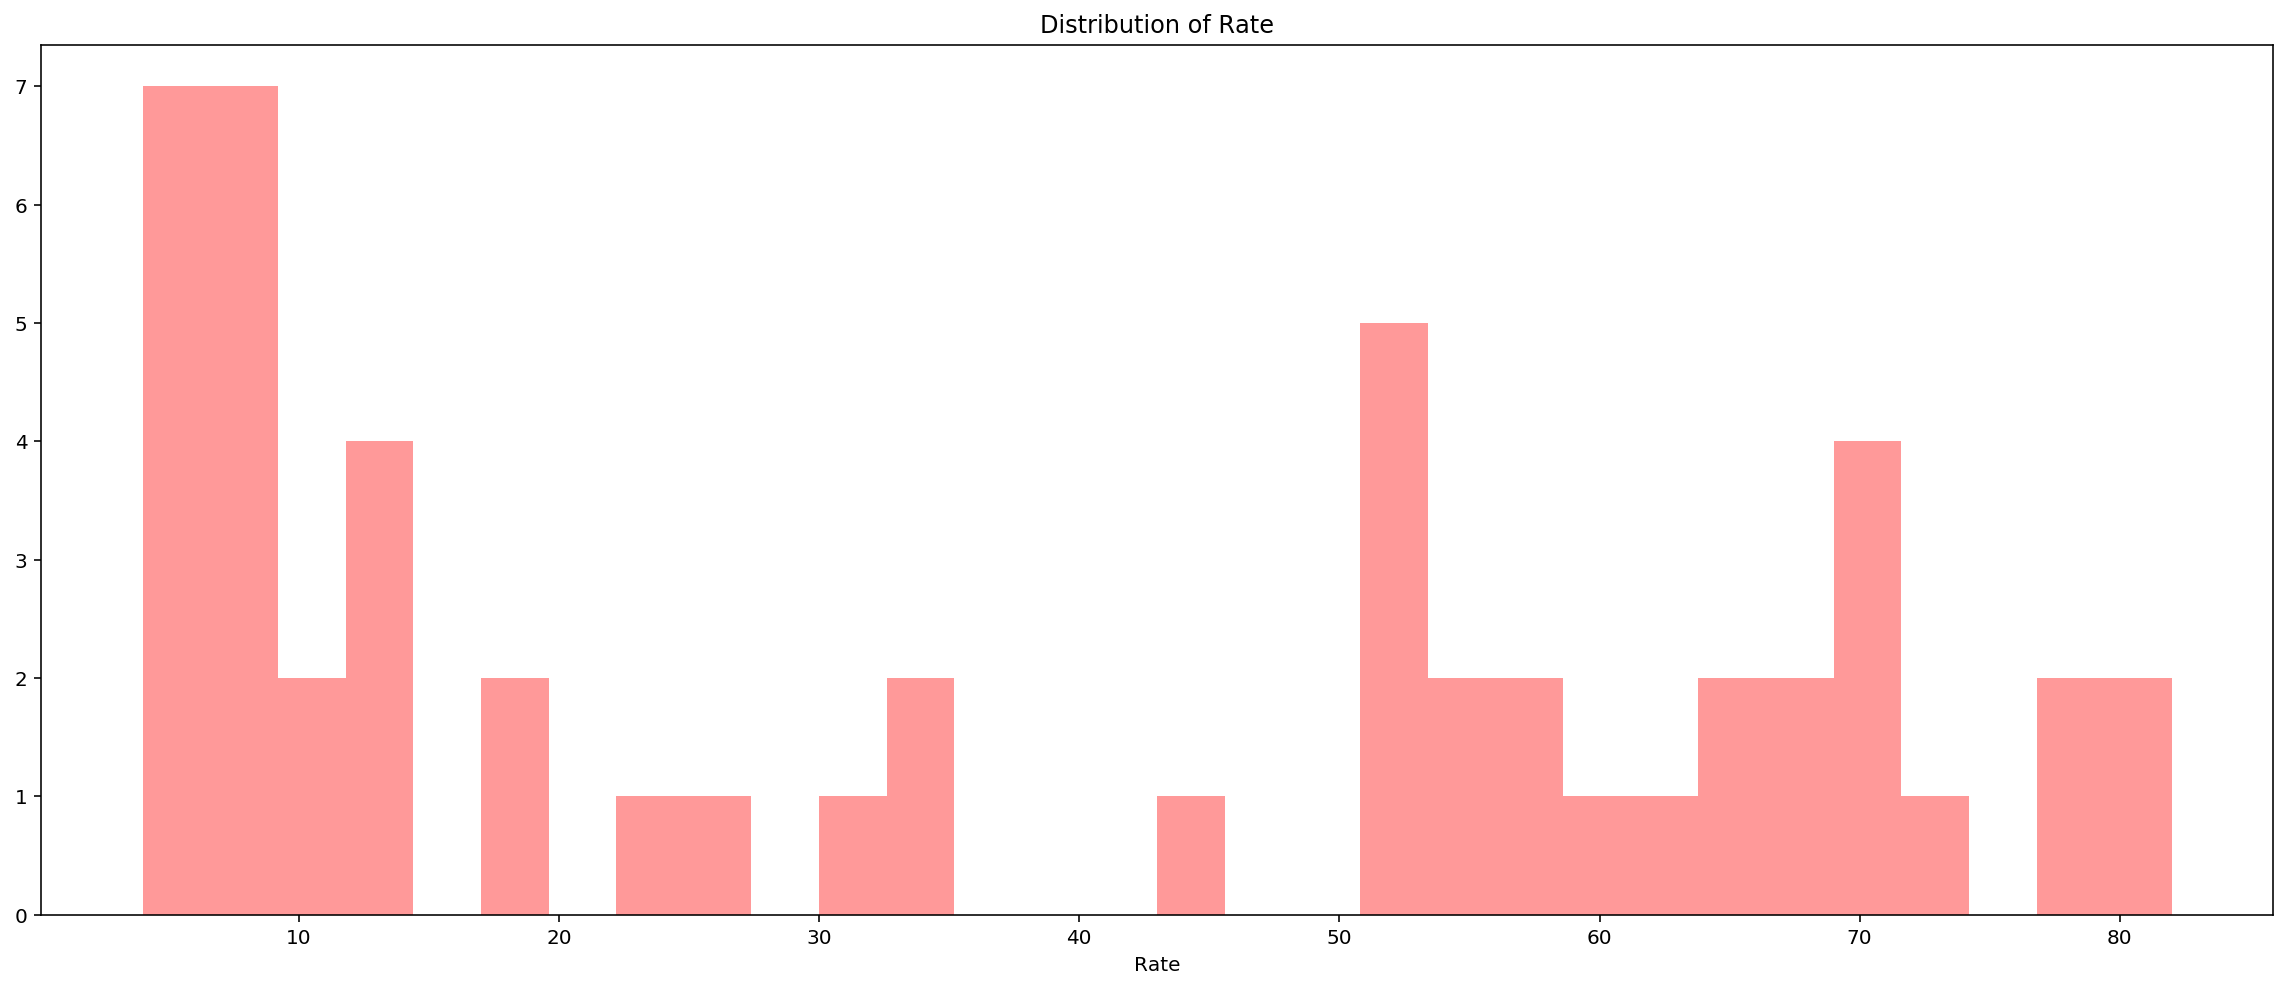

In [11]:
plt.figure(figsize=(20,8))
plt.title('Distribution of Rate')
sns.distplot(sat_df['Rate'], kde=False, bins=30, color='r')
plt.show()

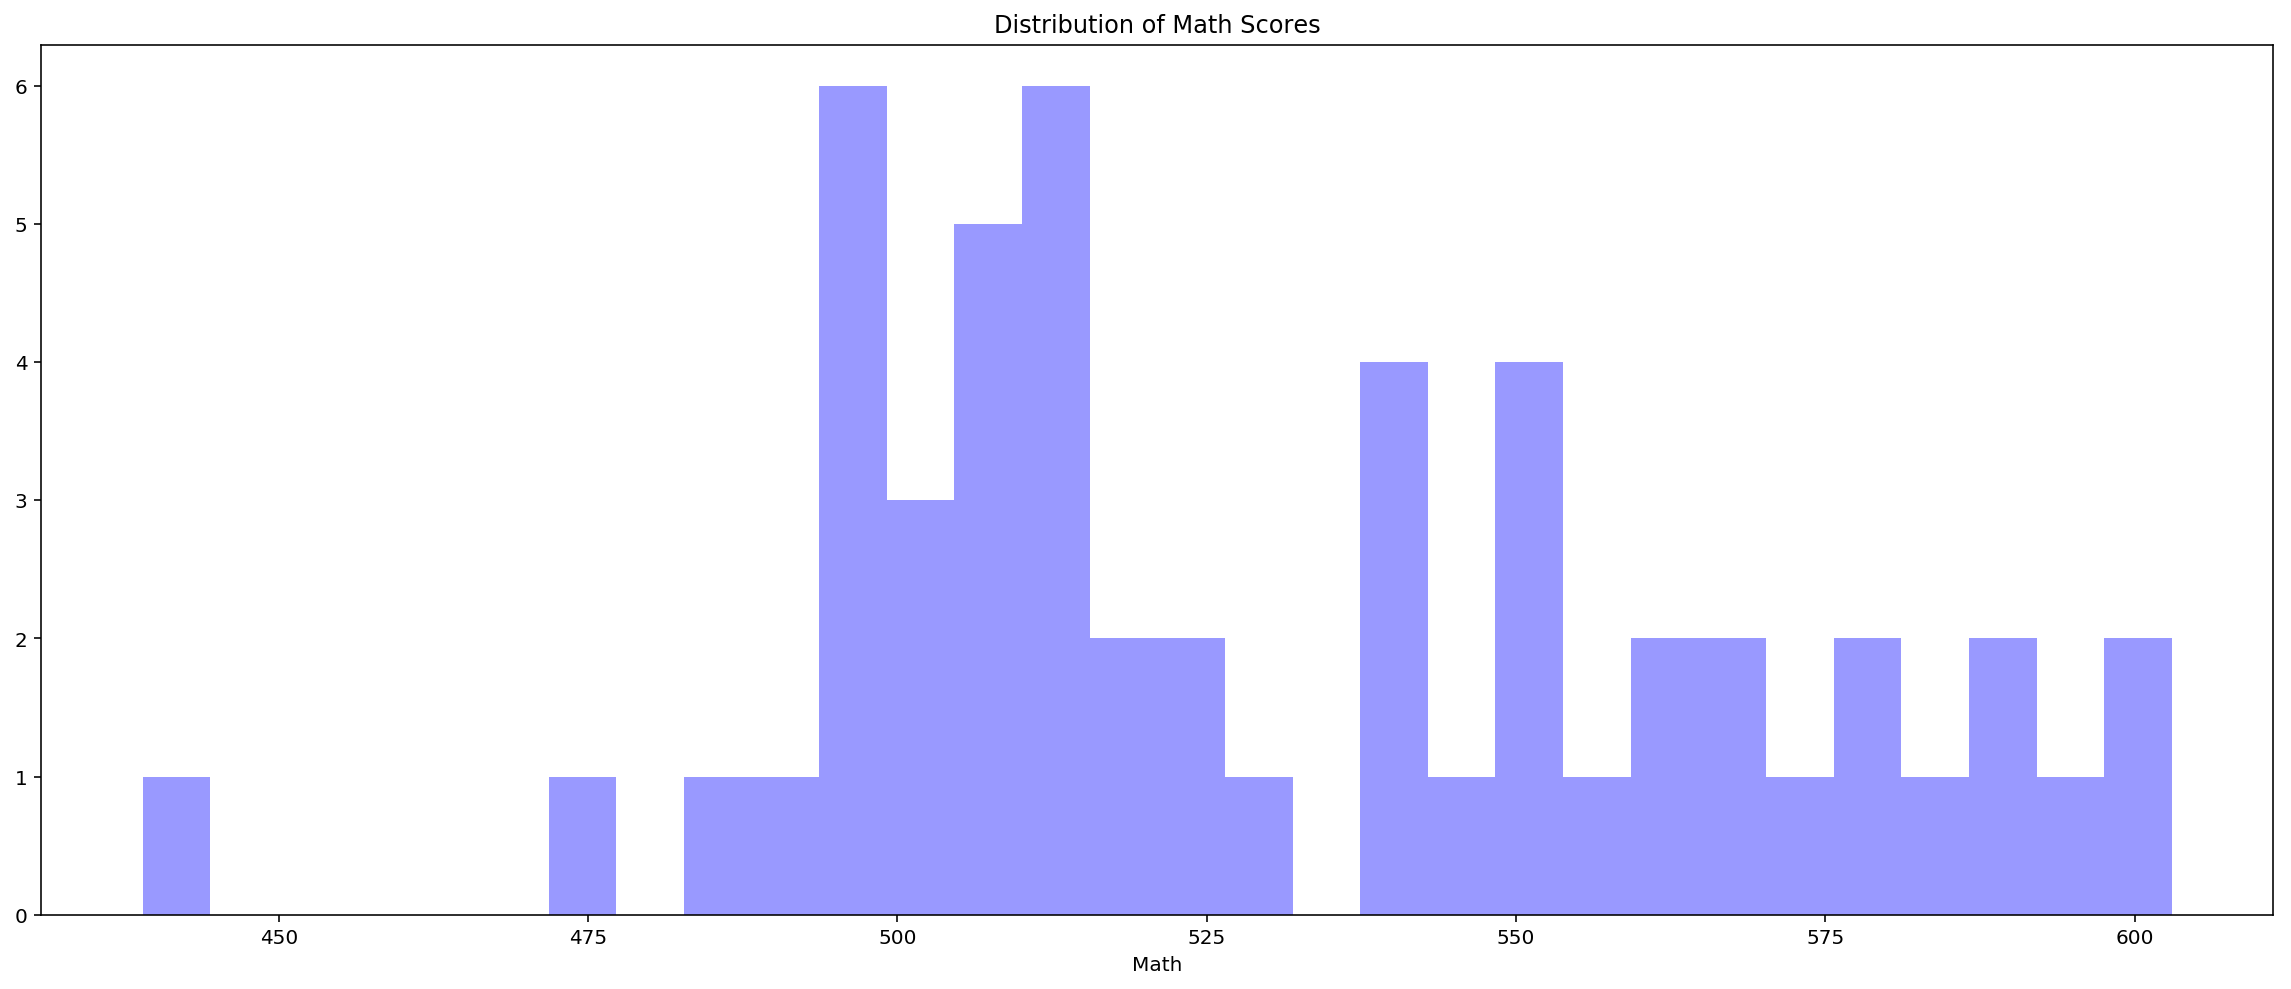

In [12]:
plt.figure(figsize=(20,8))
plt.title('Distribution of Math Scores')
sns.distplot(sat_df['Math'], kde=False, bins=30, color='b')
plt.show()

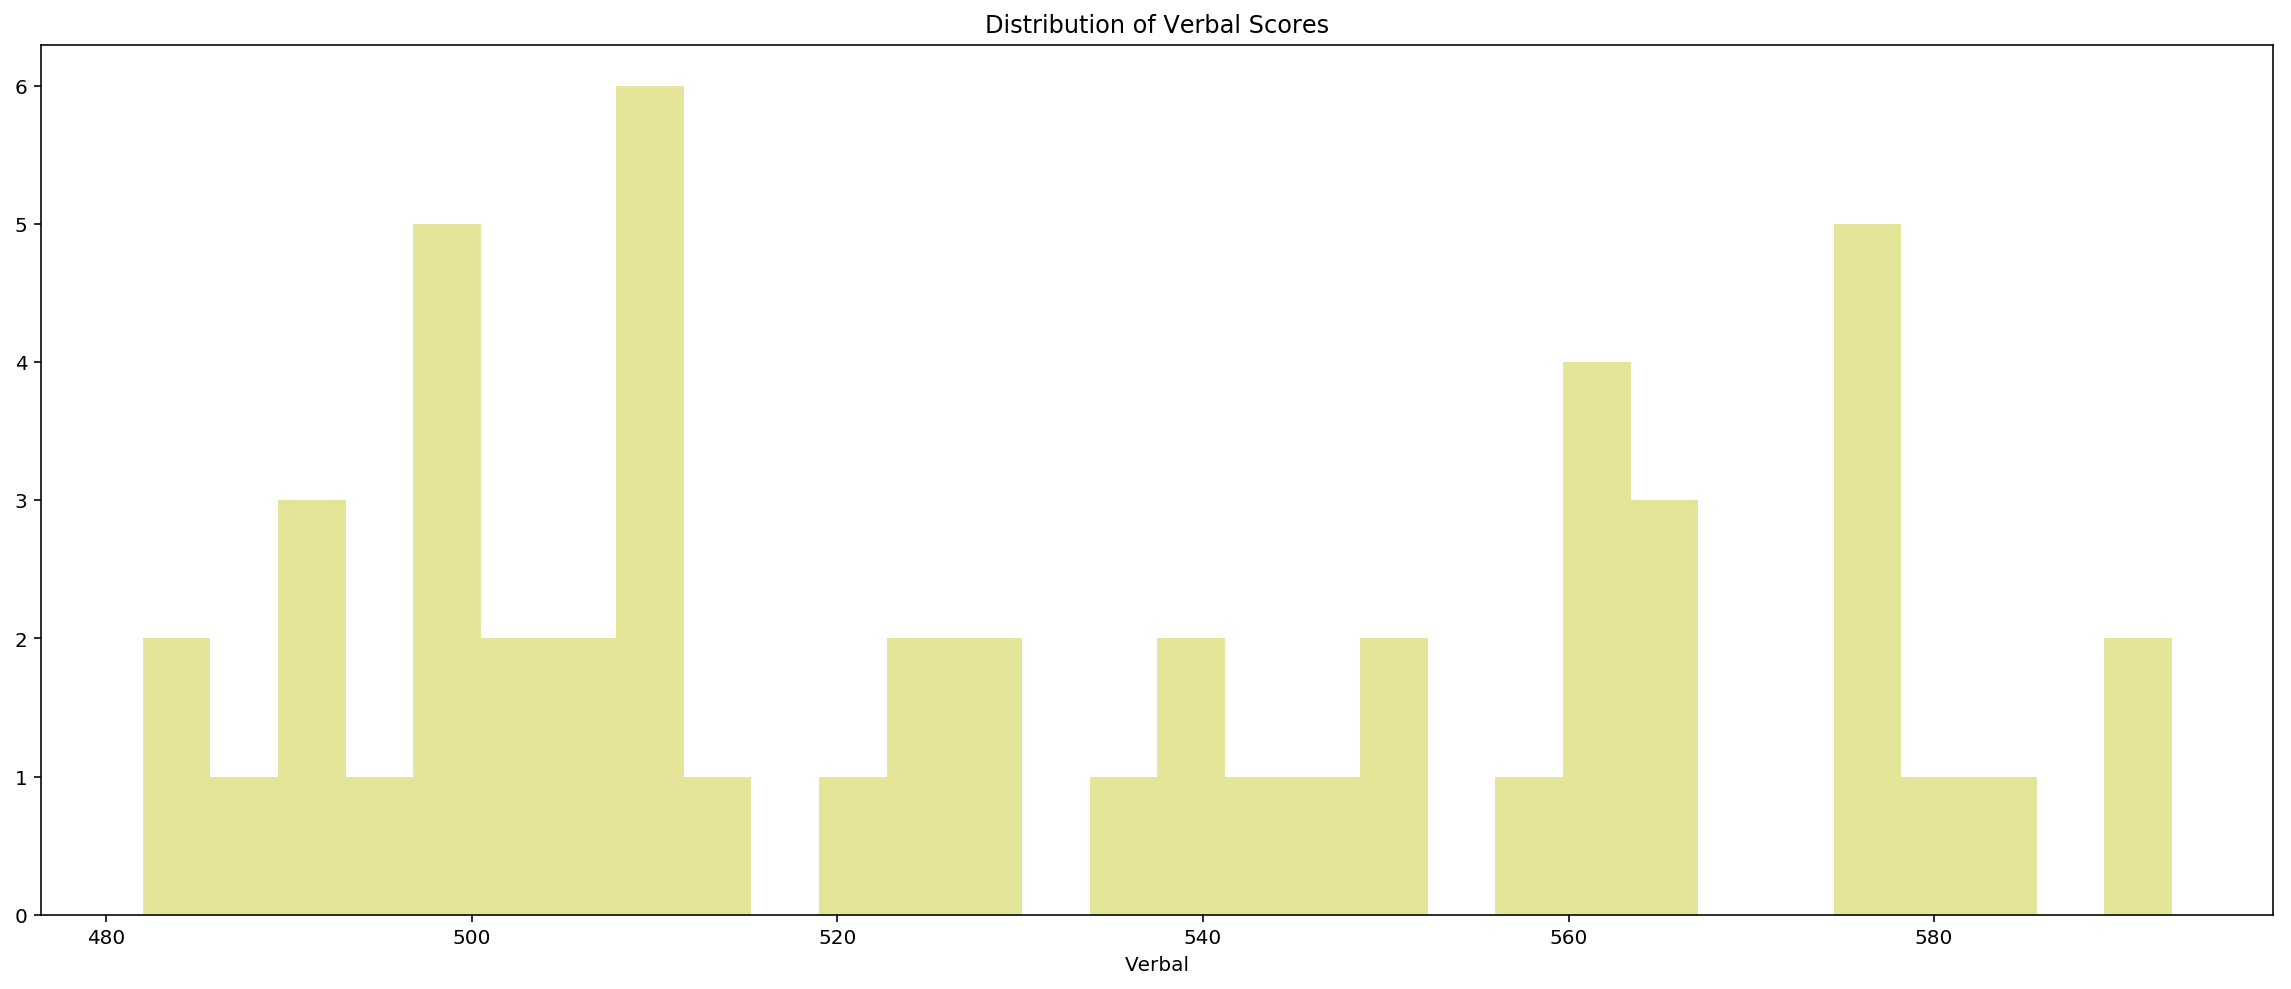

In [13]:
plt.figure(figsize=(20,8))
plt.title('Distribution of Verbal Scores')
sns.distplot(sat_df['Verbal'], kde=False, bins=30, color='y')
plt.show()

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

> `seaborn.pairplot(data, hue=None, hue_order=None, palette=None, vars=None, x_vars=None, y_vars=None, kind='scatter', diag_kind='hist', markers=None, size=2.5, aspect=1, dropna=True, plot_kws=None, diag_kws=None, grid_kws=None)`

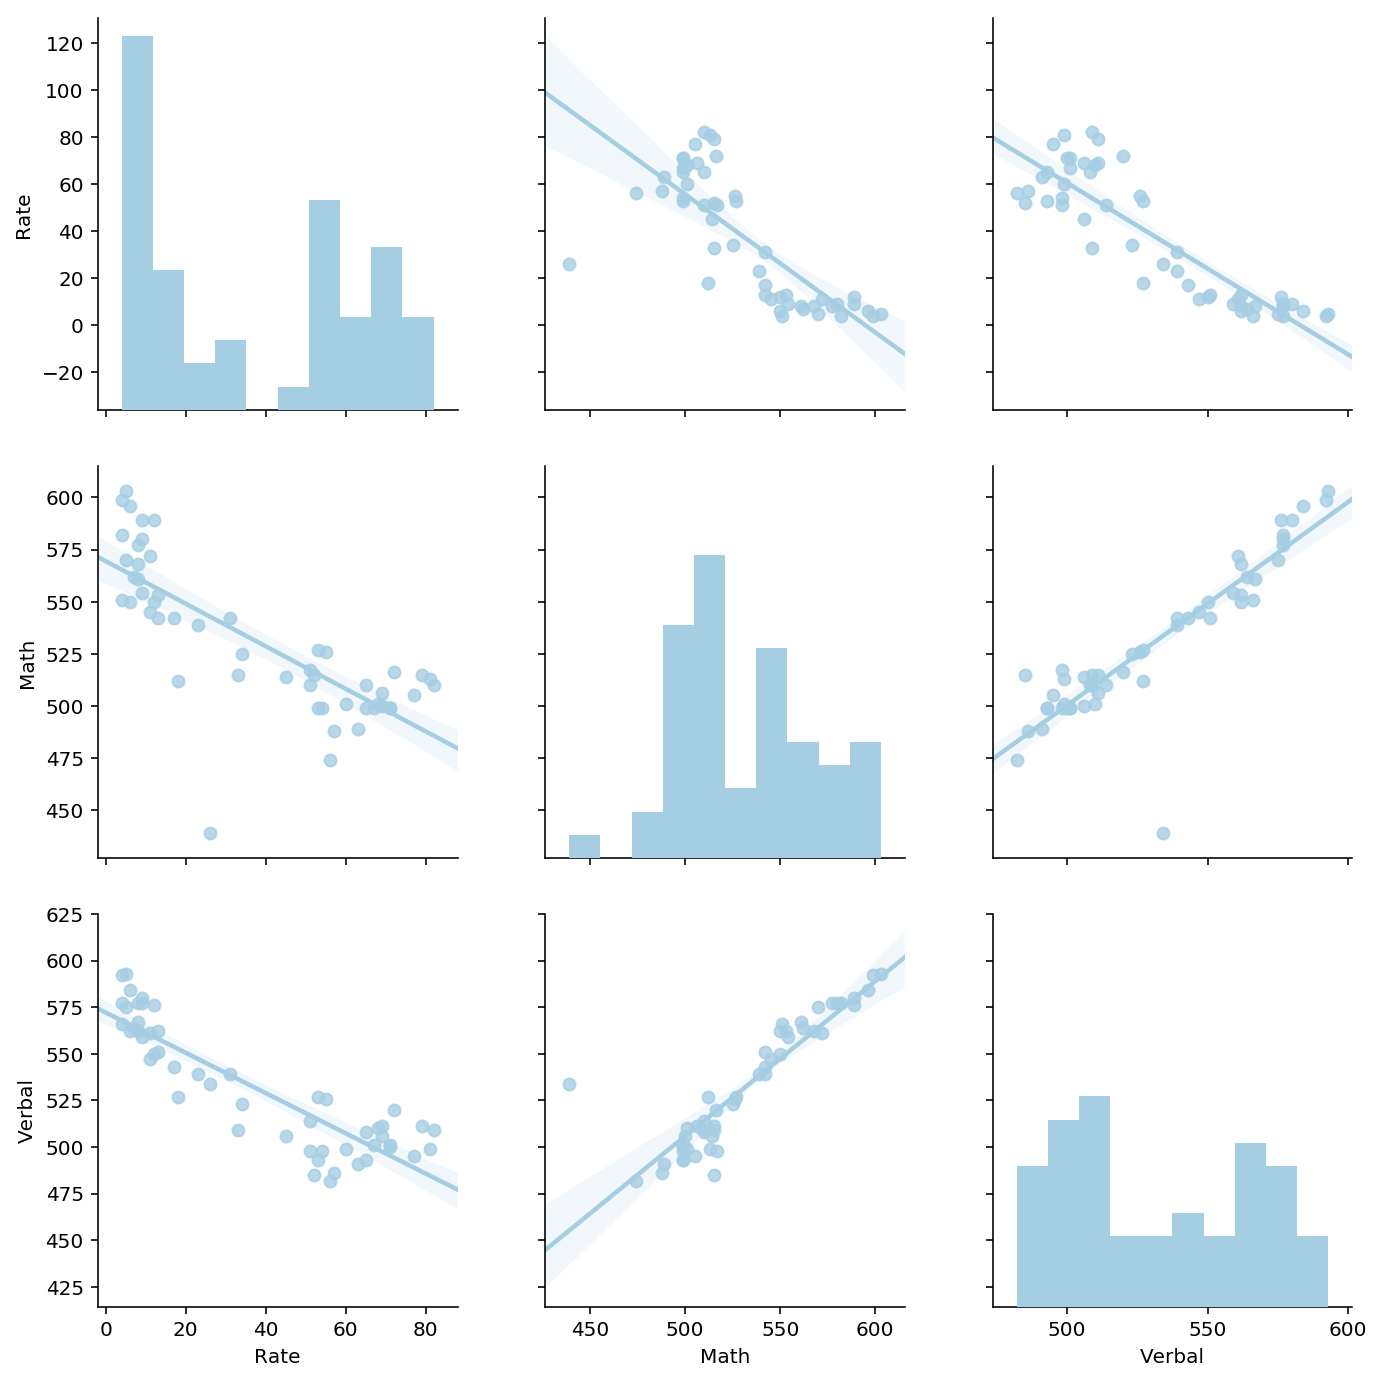

In [14]:
sns.pairplot(sat_df, vars=['Rate','Math','Verbal'], kind='reg').fig.set_size_inches(10,10)
plt.show()

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

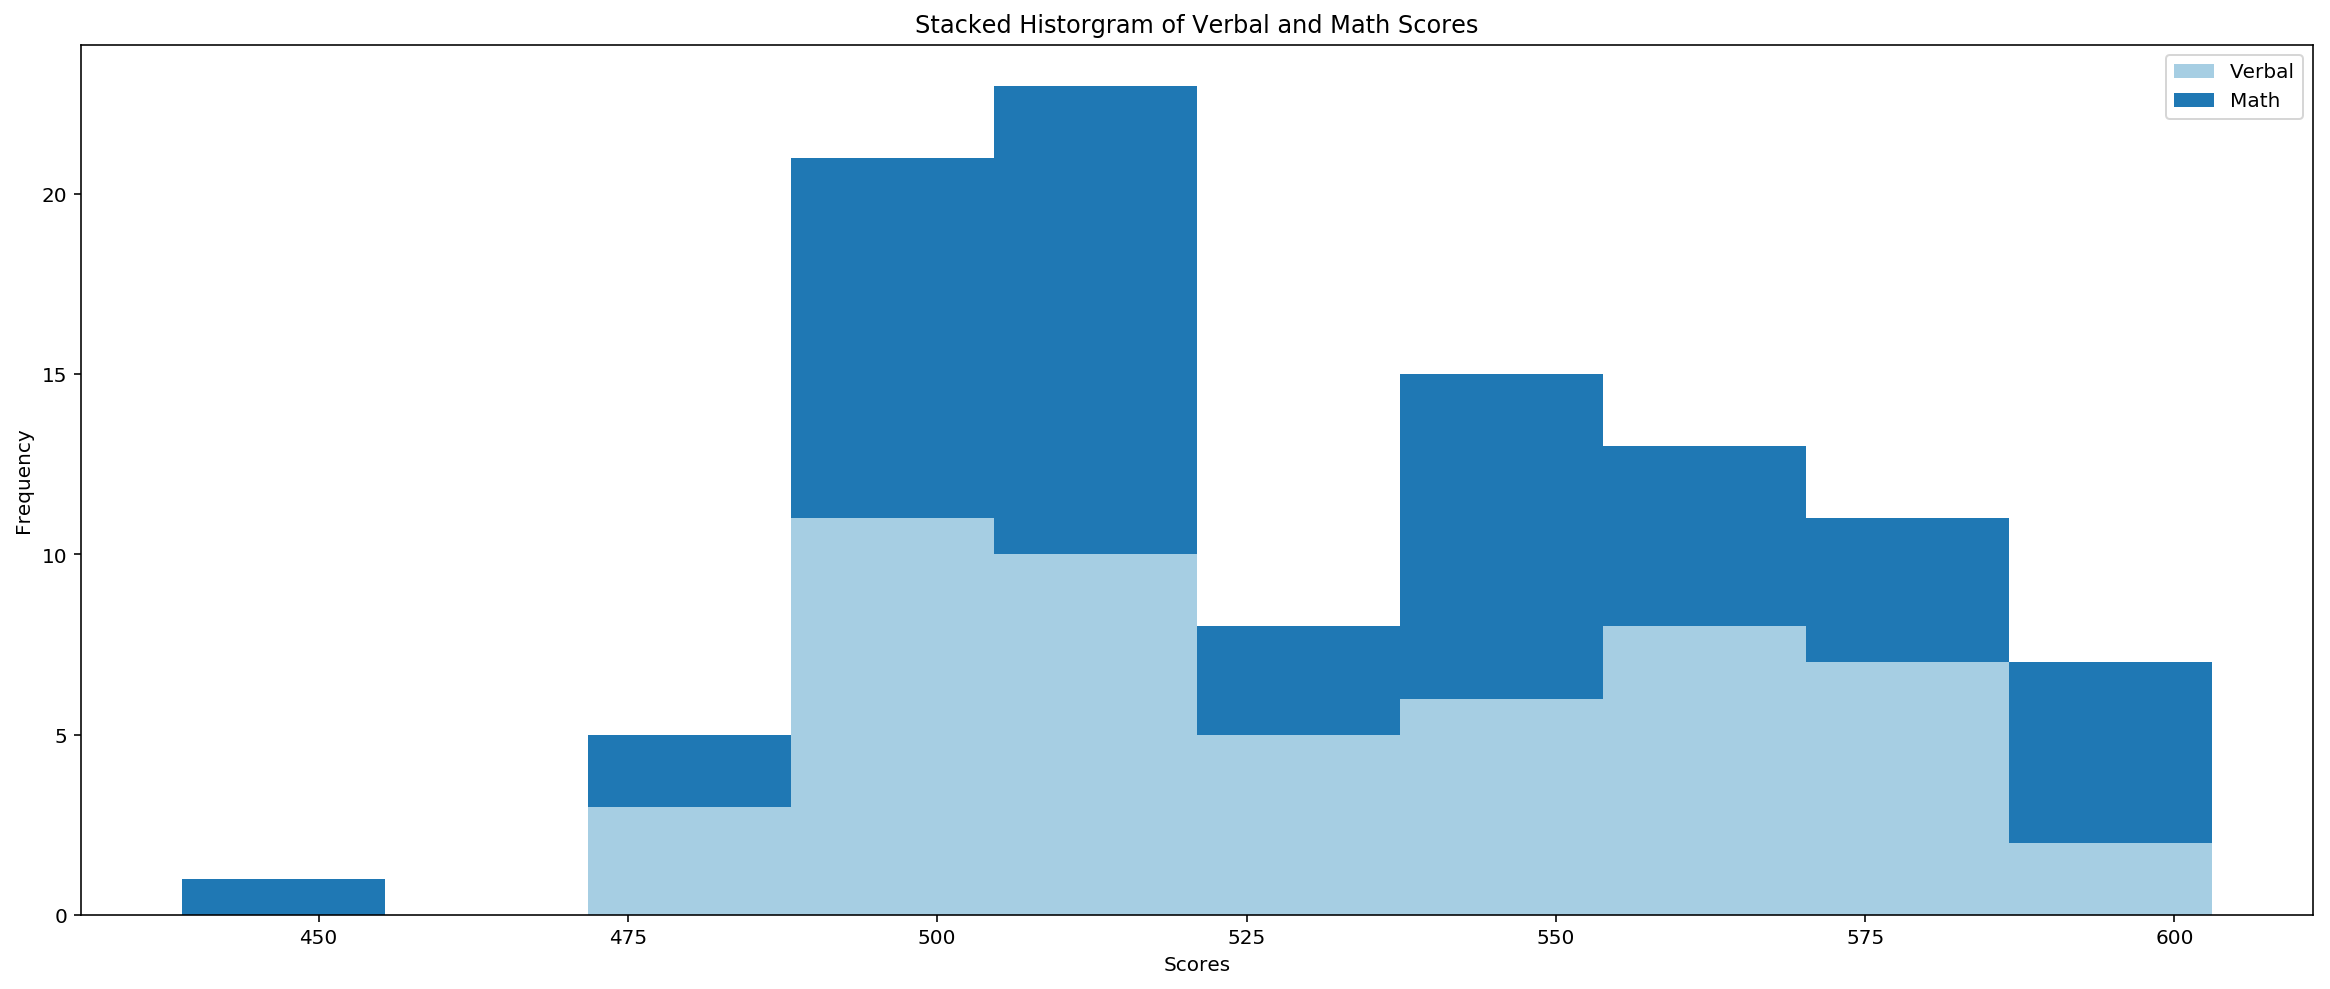

In [15]:
sat_df[['Verbal','Math']].plot.hist(stacked=True, figsize=(20,8))
plt.xlabel('Scores')
plt.title('Stacked Historgram of Verbal and Math Scores')
plt.show()

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

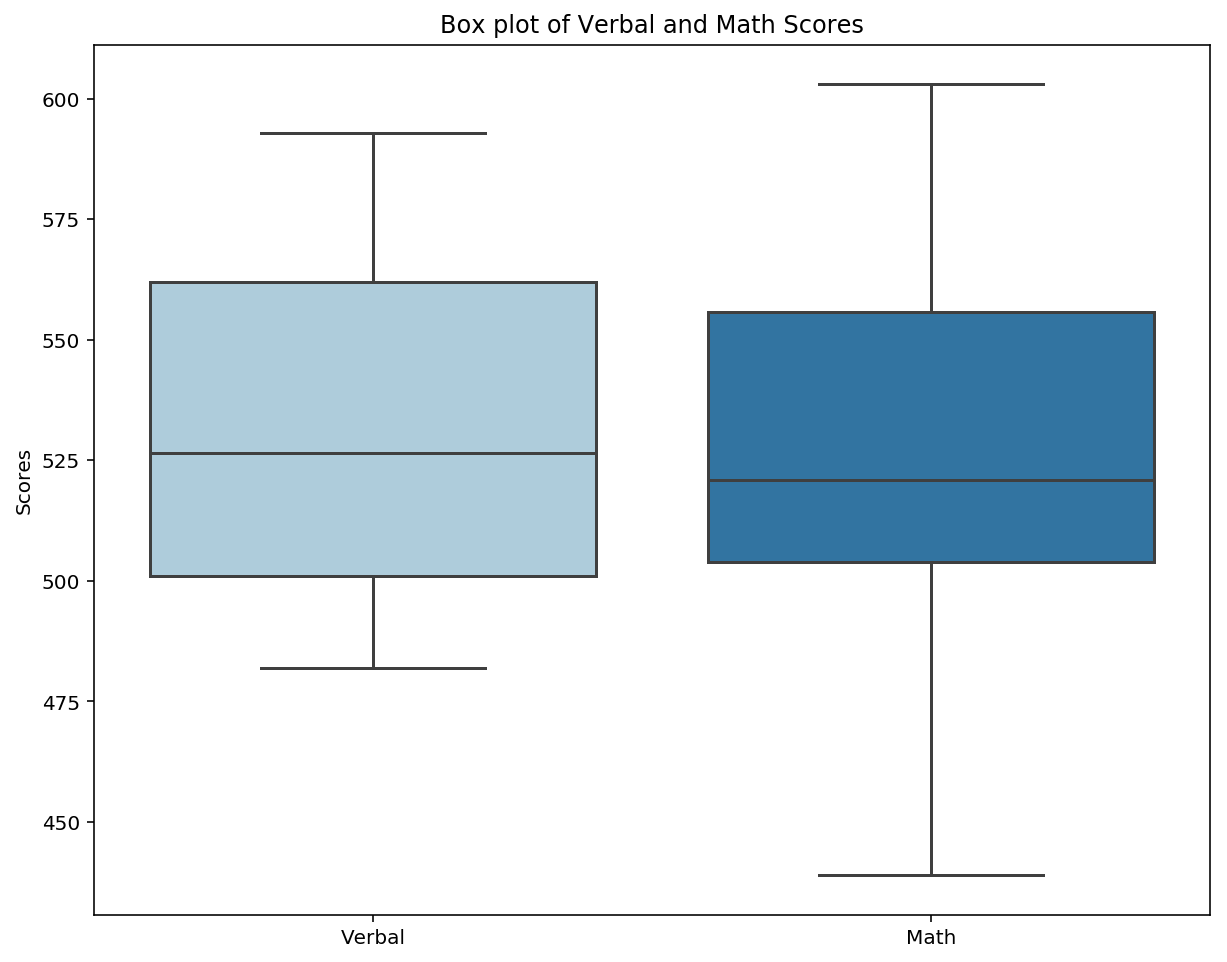

In [16]:
plt.figure(figsize=(10,8))
sns.boxplot(data=sat_df[['Verbal','Math']], orient='v')
plt.ylabel('Scores')
plt.title('Box plot of Verbal and Math Scores')
plt.show()

> The values in the Rate columns are not on the same scale as Verbal and Math. For one thing, Rate is the rate of participation per state in the tests, while Verbal and Math columns contain the average test scores.
> The min and max of Rate is also very different from the min and max of Verbal and Math. Single digits vs. triple digits.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


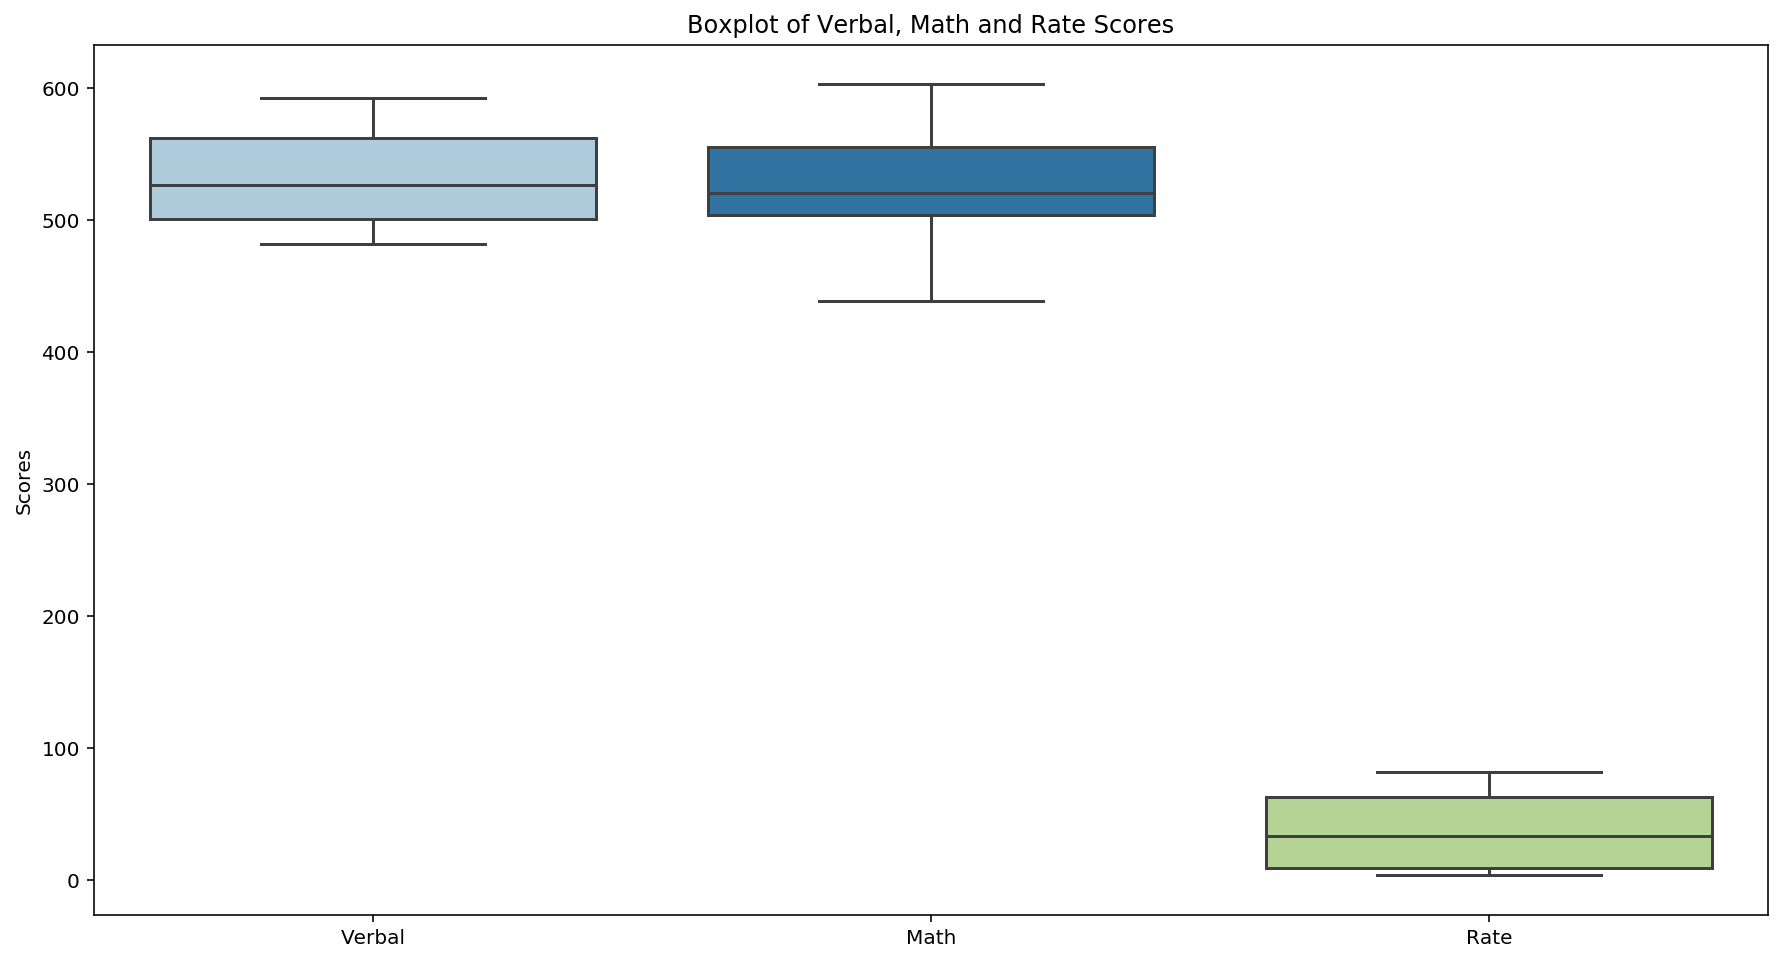

In [17]:
plt.figure(figsize=(15,8))
sns.boxplot(data=sat_df[['Verbal','Math','Rate']], orient='v')
plt.ylabel('Scores')
plt.title('Boxplot of Verbal, Math and Rate Scores')
plt.show()

In [18]:
# Using mean-normalization
# normalized_df=(df-df.mean())/df.std()
normalized_sat_df = (sat_df[['Verbal','Math','Rate']]-sat_df[['Verbal','Math','Rate']].mean())/sat_df[['Verbal','Math','Rate']].std()

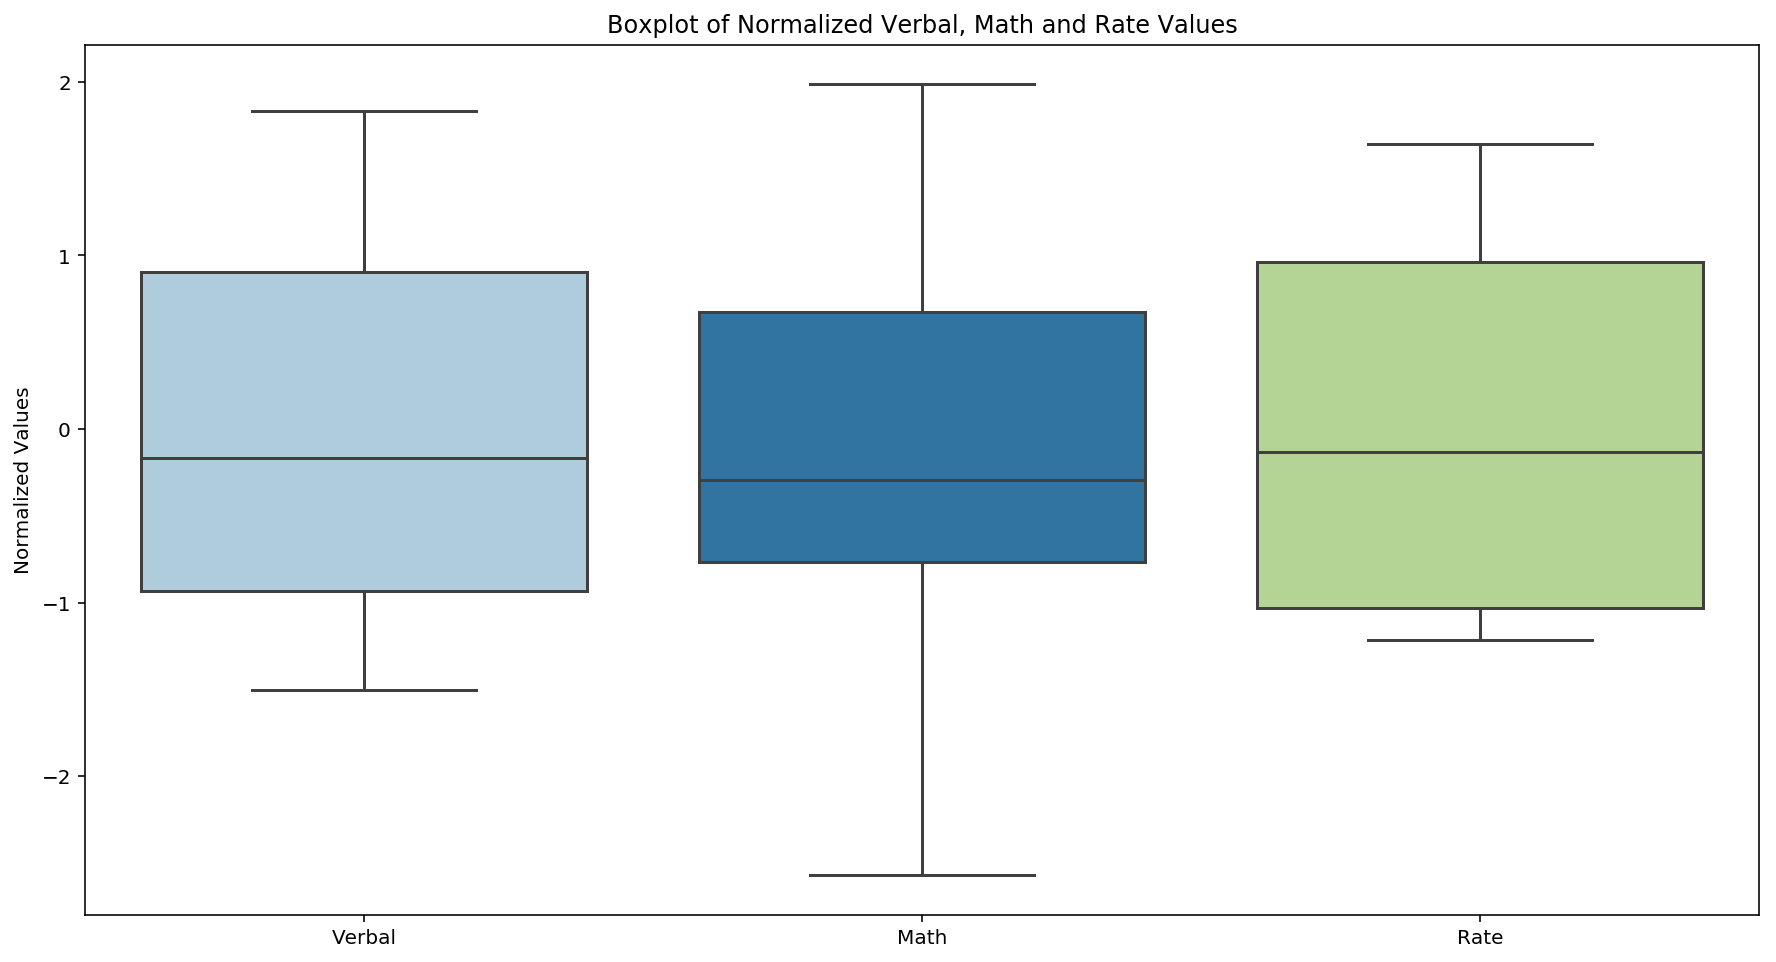

In [19]:
plt.figure(figsize=(15,8))
sns.boxplot(data=normalized_sat_df, orient='v')
plt.ylabel('Normalized Values')
plt.title('Boxplot of Normalized Verbal, Math and Rate Values')
plt.show()

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices **DEPRECIATED**
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [20]:
above_avg = sat_df['Verbal'] > sat_df['Verbal'].mean()
states_verbal_greater_avg = sat_df['State'][above_avg].tolist()

In [21]:
len(states_verbal_greater_avg)

24

> About half are above average. Total: 52. Skewed left?

### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [22]:
above_median = sat_df['Verbal'] > sat_df['Verbal'].median()
states_verbal_greater_median = sat_df['State'][above_median].tolist()

In [23]:
len(states_verbal_greater_median)

26

> The amount is not too far off 24 vs. 26. It might be... symmetrical? `(((o(*ﾟ▽ﾟ*)o)))`

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [24]:
sat_df['diff_verbal_math'] = sat_df['Verbal'] - sat_df['Math']

In [25]:
sat_df.head()

,State,Rate,Verbal,Math,diff_verbal_math
0,CT,82,509,510,-1
1,NJ,81,499,513,-14
2,MA,79,511,515,-4
3,NY,77,495,505,-10
4,NH,72,520,516,4


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [26]:
top10_positive_gap = sat_df[['State','diff_verbal_math']].sort_values(by='diff_verbal_math', ascending=False).head(10)
top10_positive_gap.head(3)

,State,diff_verbal_math
27,OH,95
50,MS,15
29,WV,15


In [27]:
top10_negative_gap = sat_df[['State','diff_verbal_math']].sort_values(by='diff_verbal_math').head(10)
top10_negative_gap.head(3)

,State,diff_verbal_math
21,HI,-30
23,CA,-19
1,NJ,-14


>  I haven't reset the index of these DataFrames. Perhaps when I have the time. 

## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [28]:
sat_corr = sat_df.corr() # It auto excludes State
sat_corr

,Rate,Verbal,Math,diff_verbal_math
Rate,1.000000,-0.886432,-0.773746,-0.101412
Verbal,-0.886432,1.000000,0.899871,0.052600
Math,-0.773746,0.899871,1.000000,-0.388219
diff_verbal_math,-0.101412,0.052600,-0.388219,1.000000


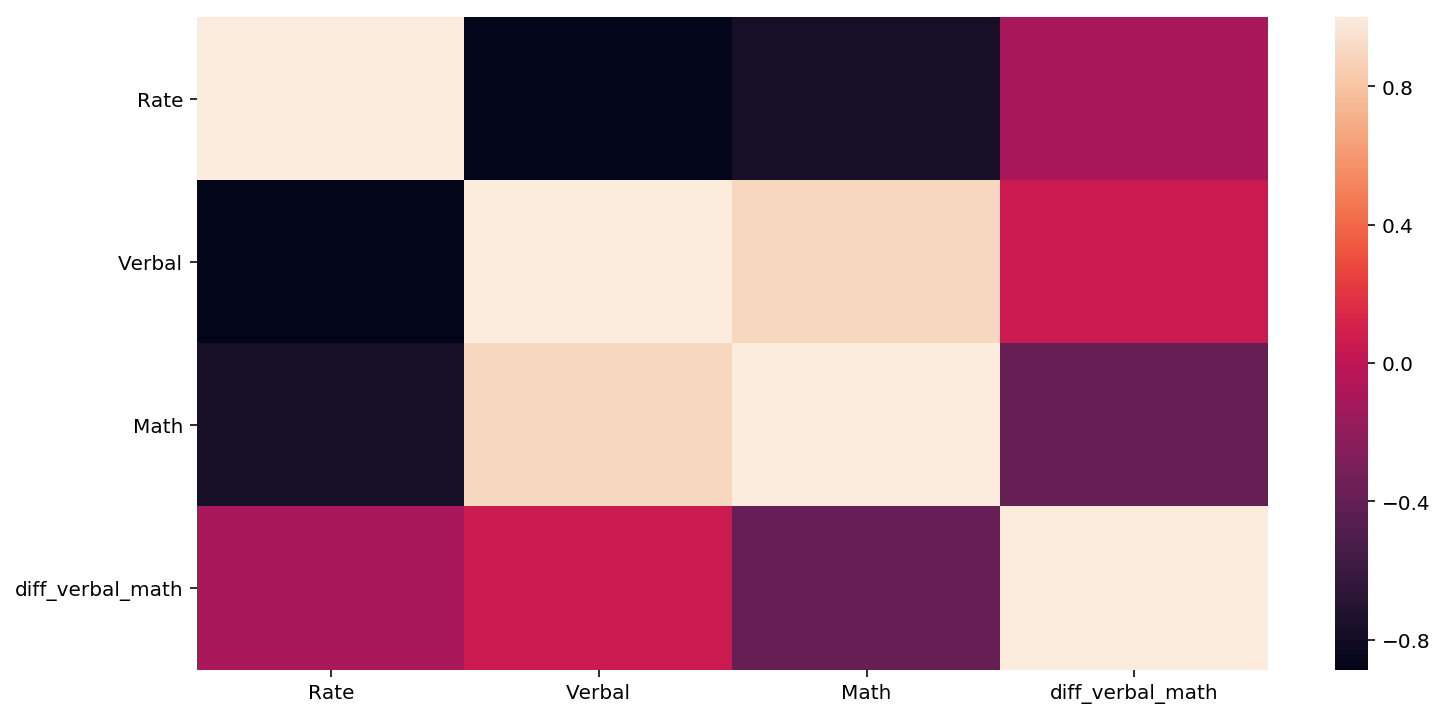

In [29]:
# Visualizing the correlation with heatmap

plt.figure(figsize=(12,6))
sns.heatmap(sat_corr, xticklabels=sat_corr.columns, yticklabels=sat_corr.columns)
plt.show()

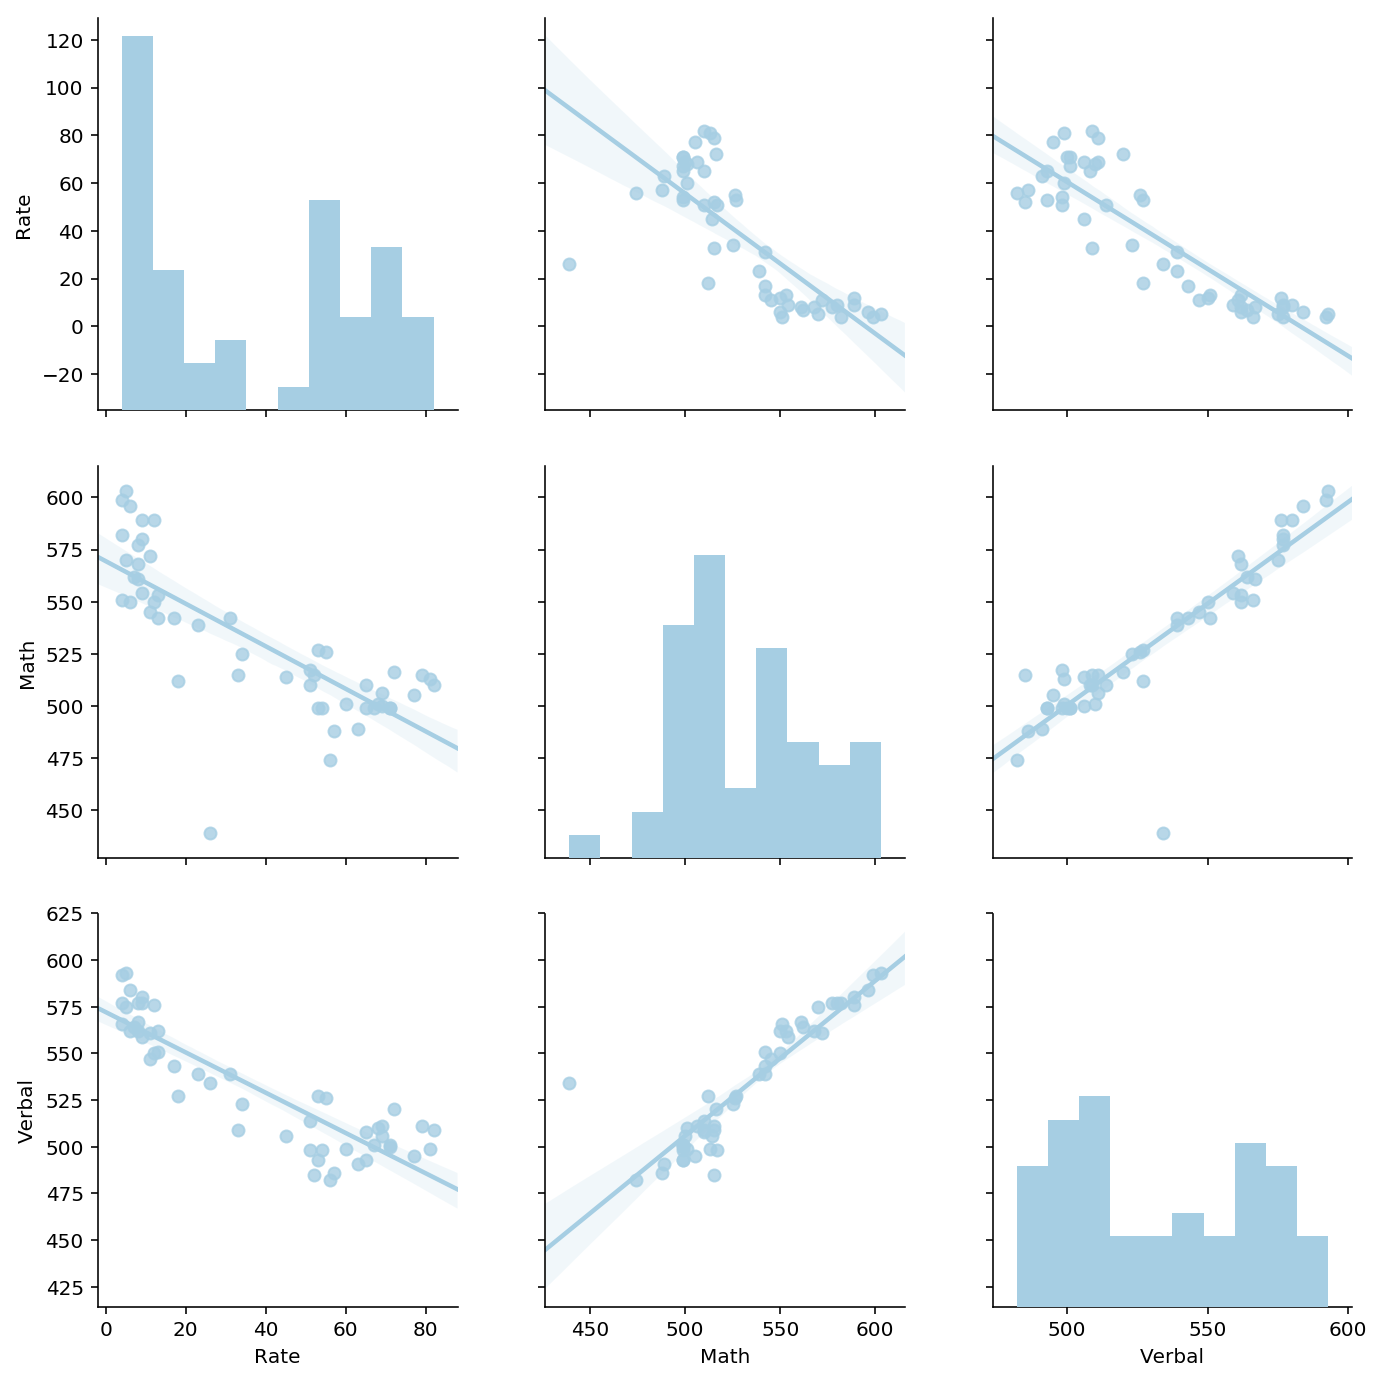

In [30]:
# Visualizing the correlation with pairplot

sns.pairplot(sat_df, vars=['Rate','Math','Verbal'], kind='reg').fig.set_size_inches(10,10)
plt.show()


> A thing or two about the relationship between Math and Verbal:
> - Math and Verbal scores are positively correlated and quite strongly so at 0.899871 (approx. 0.90) linear correlation.
> - This means that those who do well in Math tend to also do well in Verbal tests. 
> - However, the variance for Math is greater than the variance of Verbal, i.e. the range of scores in Math is quite extreme.
> - Verbal scores are not as varied compared to Math, i.e. students tend to do quite well.
> - The positive correlation between these two suggest that the worst of Math students are at least capable of scoring average and above on their Verbal tests.

> The outliers:
> - There are a few outliers in the linear regression lines between Math and Verbal. These would be those that do poorly in one but very well in the other. 
> - We all have a classmate that seemed like they dream in calculus and linear algebra but would be as silent as a mouse librarian AND a classmate that could BS their way through everything except passing Math. 
> - Based on `diff_verbal_math` scores, the state that does very well in Verbal tests on average but poorly in Math: Ohio (from `top10_positive_gap`)
> - Contrastingly, the states that do very well in Math but poorly in Verbal tests: Hawaii (from `top10_negative_gap`)

> Participation rate:
> - The strong negative correlation (-0.88 and -0.77) suggests that the higher the participation rate the worst the average scores tend to be. While the states that tend to do well are those that had low participation rate. 
> - Does this mean that for some states, participation in the tests are encouraged ONLY IF the students would be able to do well, or these states have a lower population count compared to the rest? 

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [31]:
sat_df.describe()

,Rate,Verbal,Math,diff_verbal_math
count,52.000000,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000,0.519231
std,27.301788,33.236225,36.014975,15.729939
min,4.000000,482.000000,439.000000,-30.000000
25%,9.000000,501.000000,504.000000,-6.000000
50%,33.500000,526.500000,521.000000,0.000000
75%,63.500000,562.000000,555.750000,4.250000
max,82.000000,593.000000,603.000000,95.000000


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [32]:
sat_cov = sat_df.cov()
sat_cov

,Rate,Verbal,Math,diff_verbal_math
Rate,745.387632,-804.355958,-760.803922,-43.552036
Verbal,-804.355958,1104.646682,1077.147059,27.499623
Math,-760.803922,1077.147059,1297.078431,-219.931373
diff_verbal_math,-43.552036,27.499623,-219.931373,247.430995


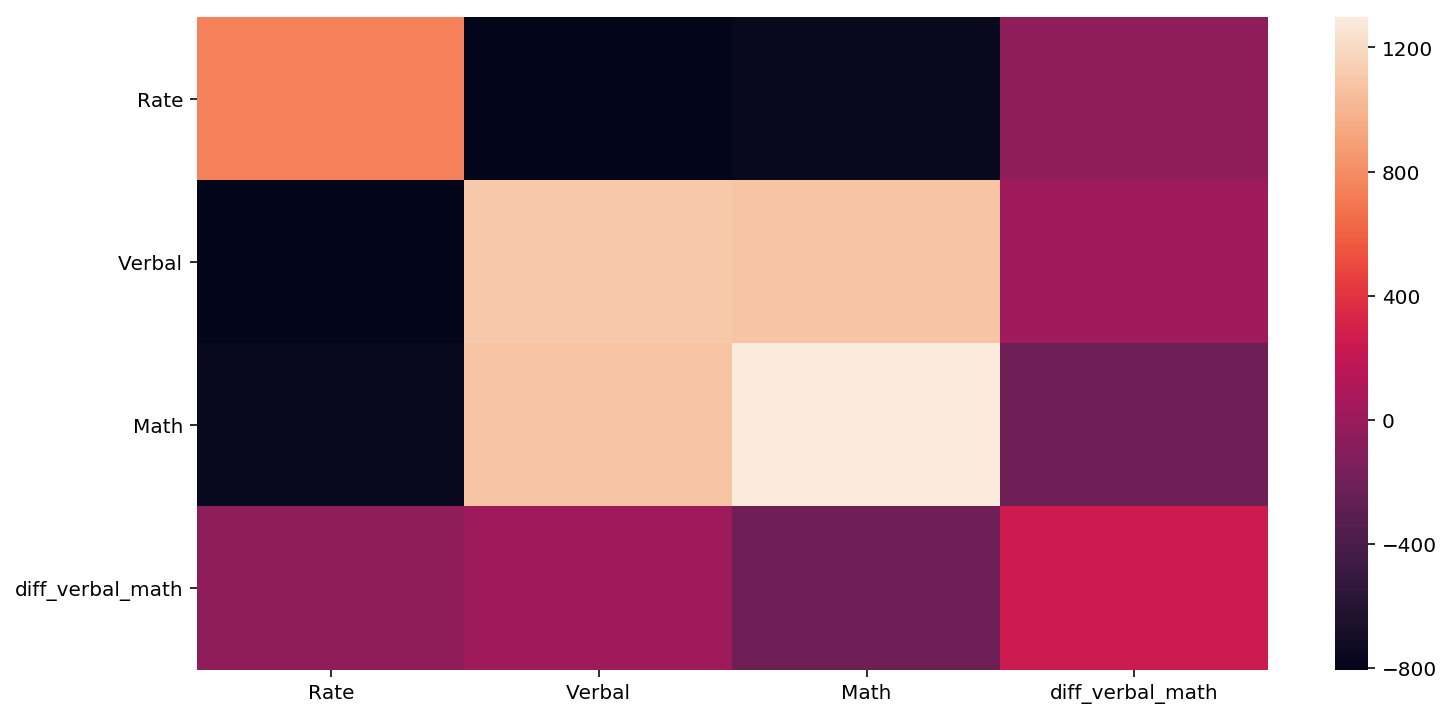

In [33]:
plt.figure(figsize=(12,6))
sns.heatmap(sat_cov, xticklabels=sat_cov.columns, yticklabels=sat_cov.columns)
plt.show()

> https://www.linkedin.com/pulse/covariance-vs-correlation-kumar-p

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [34]:
drugs_df = pd.read_csv('./drug-use-by-age.csv')

In [35]:
drugs_df.shape

(17, 28)

In [36]:
drugs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          17 non-null object
crack-use                  17 non-null float64
crack-frequency            17 non-null object
heroin-use                 17 non-null float64
heroin-frequency           17 non-null object
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         17 non-null object
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycontin-f

In [37]:
drugs_df.isnull().sum()

age                        0
n                          0
alcohol-use                0
alcohol-frequency          0
marijuana-use              0
marijuana-frequency        0
cocaine-use                0
cocaine-frequency          0
crack-use                  0
crack-frequency            0
heroin-use                 0
heroin-frequency           0
hallucinogen-use           0
hallucinogen-frequency     0
inhalant-use               0
inhalant-frequency         0
pain-releiver-use          0
pain-releiver-frequency    0
oxycontin-use              0
oxycontin-frequency        0
tranquilizer-use           0
tranquilizer-frequency     0
stimulant-use              0
stimulant-frequency        0
meth-use                   0
meth-frequency             0
sedative-use               0
sedative-frequency         0
dtype: int64

> Based on the [website](https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age), every column should be float64 except column 'n' (int64) and column 'age' (str).

In [38]:
# Extract all of the object columns
object_columns = ['cocaine-frequency','crack-frequency','heroin-frequency','inhalant-frequency','oxycontin-frequency','meth-frequency']

In [39]:
drugs_df[object_columns] = drugs_df[object_columns].replace('-',np.NaN).apply(pd.to_numeric)

In [40]:
drugs_df = drugs_df.fillna(0.0)

In [41]:
drugs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          17 non-null float64
crack-use                  17 non-null float64
crack-frequency            17 non-null float64
heroin-use                 17 non-null float64
heroin-frequency           17 non-null float64
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         17 non-null float64
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycont

### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

> Split use vs. frequency

In [42]:
# df.loc[:, df.columns.str.contains('alp')]

drugs_freq_df = drugs_df.loc[:, drugs_df.columns.str.contains('frequency')]

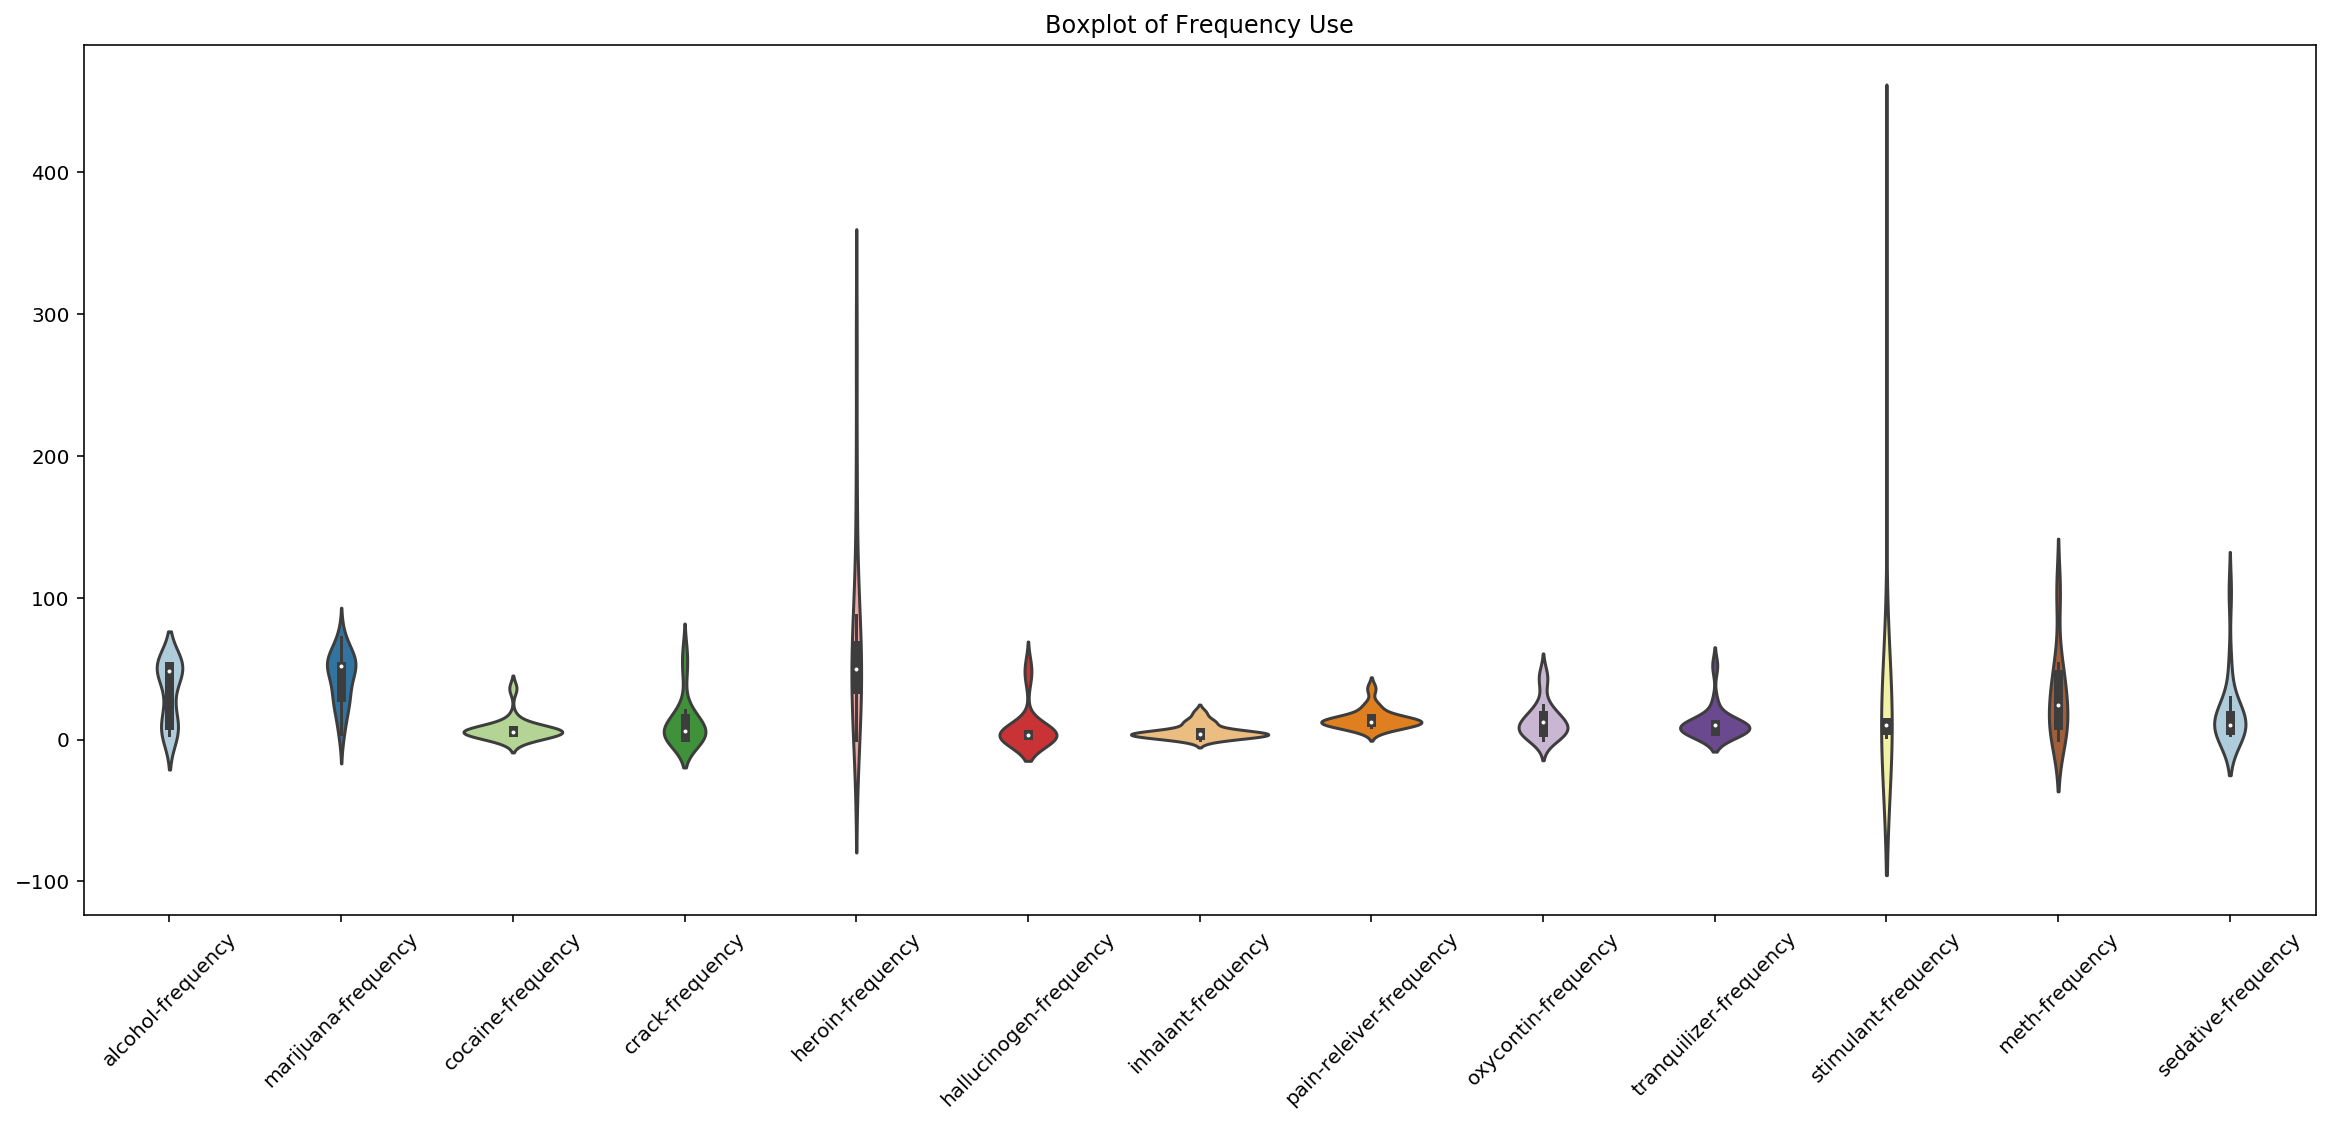

In [43]:
plt.figure(figsize=(20,8))
sns.violinplot(data=drugs_freq_df)
plt.title('Boxplot of Frequency Use')
plt.xticks(rotation=45)
plt.show()

In [44]:
drugs_use_df = drugs_df.loc[:, drugs_df.columns.str.contains('use')]

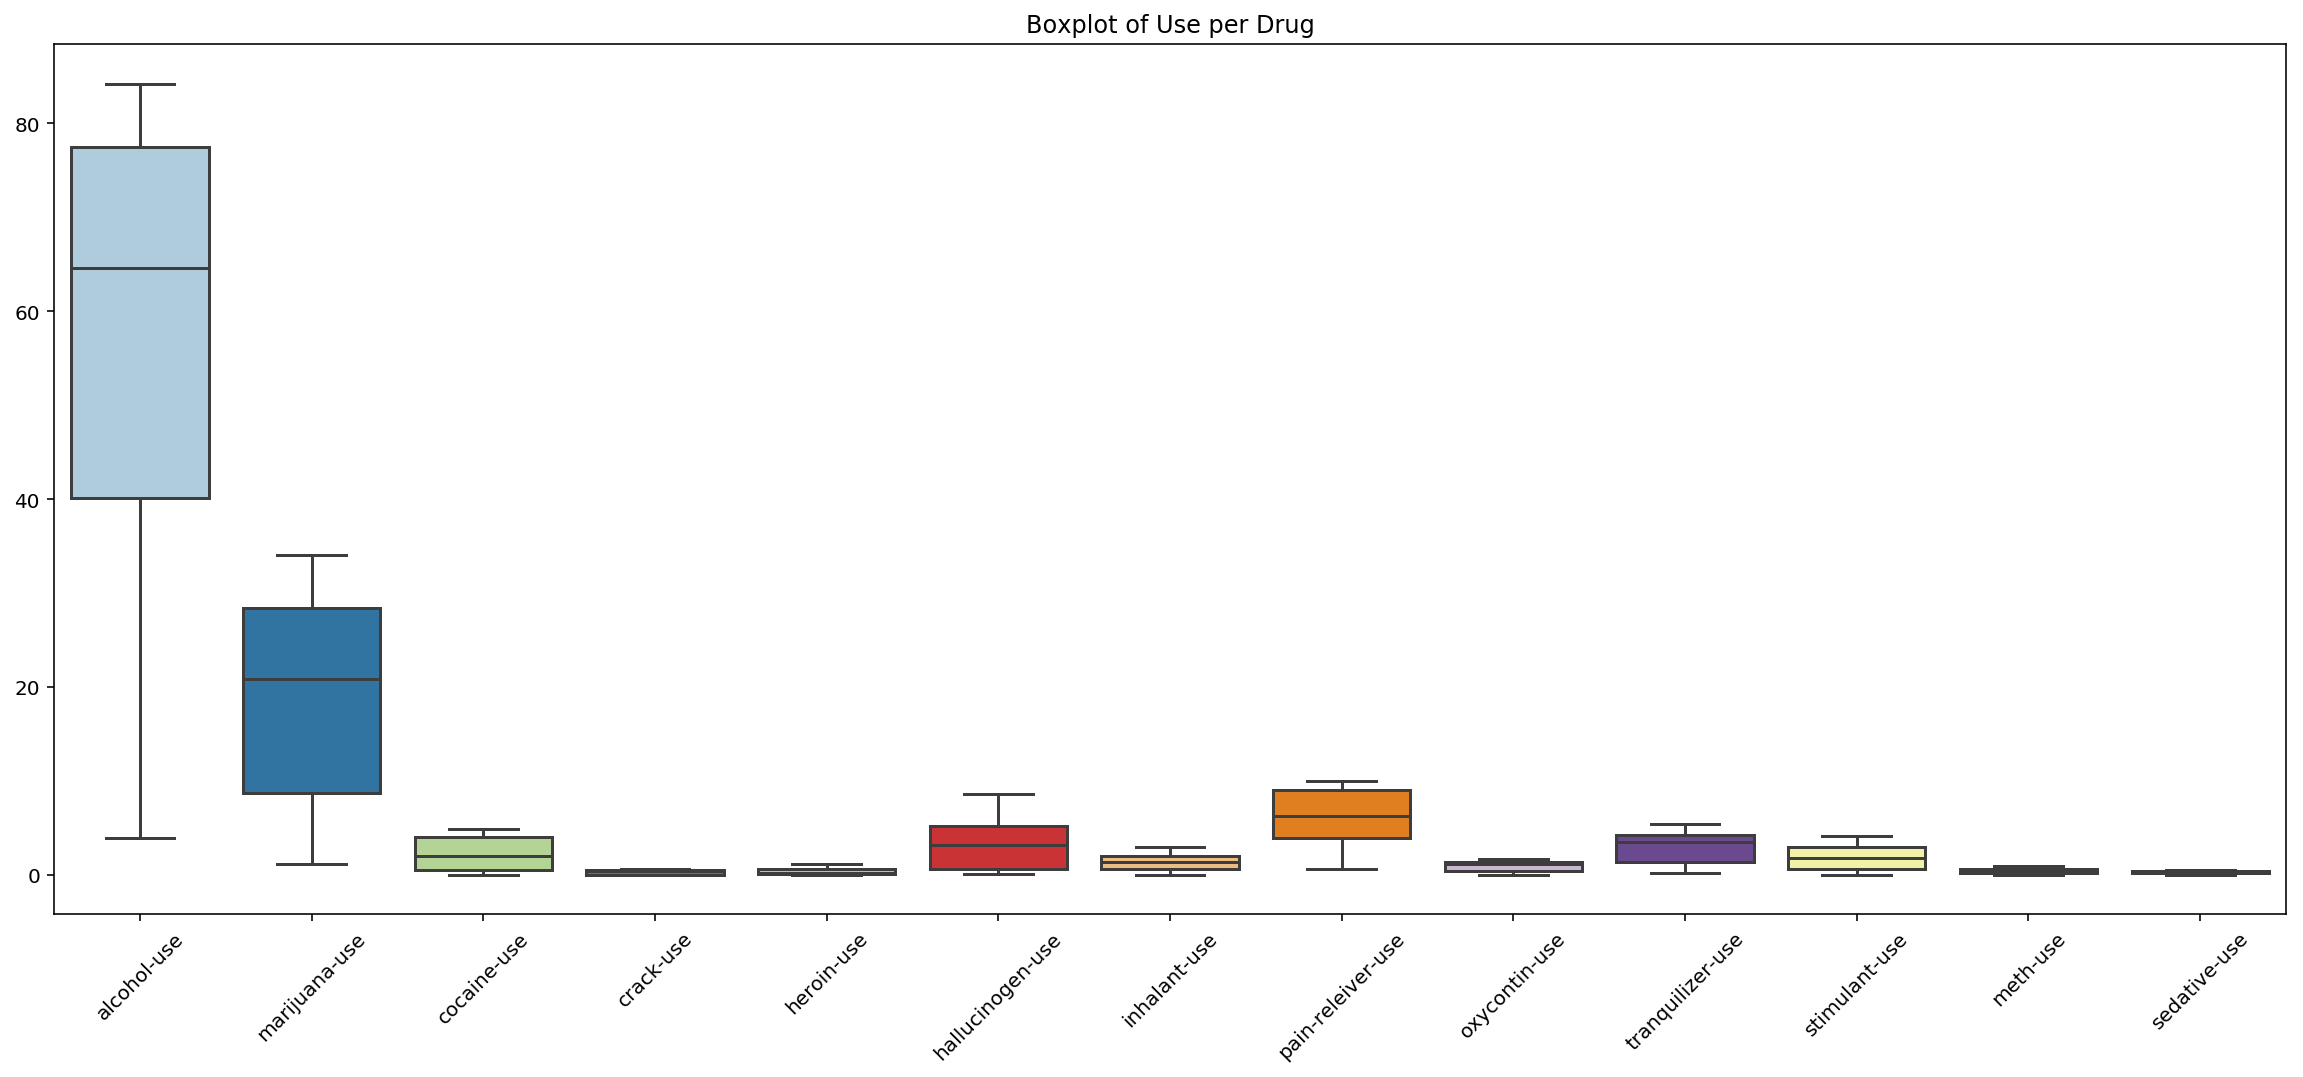

In [45]:
plt.figure(figsize=(20,8))
sns.boxplot(data=drugs_use_df)
plt.title('Boxplot of Use per Drug')
plt.xticks(rotation=45)
plt.show()

In [46]:
# Average mean of means
np.mean(drugs_df.iloc[:,2:].mean())

15.248642533936653

In [47]:
np.median(drugs_df.iloc[:,2:].median())

5.5

In [48]:
drugs_use_list = drugs_use_df.mean().tolist()

In [49]:
drugs_use_df.describe()

,alcohol-use,marijuana-use,cocaine-use,crack-use,heroin-use,hallucinogen-use,inhalant-use,pain-releiver-use,oxycontin-use,tranquilizer-use,stimulant-use,meth-use,sedative-use
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,55.429412,18.923529,2.176471,0.294118,0.352941,3.394118,1.388235,6.270588,0.935294,2.805882,1.917647,0.382353,0.282353
std,26.878866,11.959752,1.816772,0.235772,0.333762,2.792506,0.927283,3.166379,0.608216,1.753379,1.407673,0.262762,0.138000
min,3.900000,1.100000,0.000000,0.000000,0.000000,0.100000,0.000000,0.600000,0.000000,0.200000,0.000000,0.000000,0.000000
25%,40.100000,8.700000,0.500000,0.000000,0.100000,0.600000,0.600000,3.900000,0.400000,1.400000,0.600000,0.200000,0.200000
50%,64.600000,20.800000,2.000000,0.400000,0.200000,3.200000,1.400000,6.200000,1.100000,3.500000,1.800000,0.400000,0.300000
75%,77.500000,28.400000,4.000000,0.500000,0.600000,5.200000,2.000000,9.000000,1.400000,4.200000,3.000000,0.600000,0.400000
max,84.200000,34.000000,4.900000,0.600000,1.100000,8.600000,3.000000,10.000000,1.700000,5.400000,4.100000,0.900000,0.500000


In [50]:
drugs_freq_list = drugs_freq_df.mean().tolist()

In [51]:
drugs_use_freq_diff = [x-y for x,y in zip(drugs_use_list, drugs_freq_list)]
drugs_use_freq_diff = pd.Series(drugs_use_freq_diff, name='use_freq_diff')

drugs = ['alcohol', 'marijuana', 'cocaine', 'crack', 'heroin', 'hallucinogen', 'inhalant', 'pain-releiver', 'oxycontin', 'tranquilizer', 'stimulant', 'meth', 'sedative']
drugs_name = pd.Series(drugs, name='drug_name')

drugs_use_freq_diff_df = pd.concat([drugs_name, drugs_use_freq_diff], axis=1)
drugs_use_freq_diff_df.sort_values('use_freq_diff')

,drug_name,use_freq_diff
4,heroin,-68.617647
11,meth,-31.352941
10,stimulant,-29.229412
1,marijuana,-24.017647
12,sedative,-19.100000
8,oxycontin,-13.005882
3,crack,-12.088235
9,tranquilizer,-8.929412
7,pain-releiver,-8.435294
2,cocaine,-5.235294


In [52]:
drugs_freq_df.describe()

,alcohol-frequency,marijuana-frequency,cocaine-frequency,crack-frequency,heroin-frequency,hallucinogen-frequency,inhalant-frequency,pain-releiver-frequency,oxycontin-frequency,tranquilizer-frequency,stimulant-frequency,meth-frequency,sedative-frequency
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,33.352941,42.941176,7.411765,12.382353,68.970588,8.411765,5.794118,14.705882,13.941176,11.735294,31.147059,31.735294,19.382353
std,21.318833,18.362566,8.014119,17.361532,70.153285,15.000245,4.937291,6.935098,12.902134,11.485205,85.973790,32.206423,24.833527
min,3.000000,4.000000,0.000000,0.000000,0.000000,2.000000,0.000000,7.000000,0.000000,4.500000,2.000000,0.000000,3.000000
25%,10.000000,30.000000,5.000000,2.000000,35.500000,3.000000,3.000000,12.000000,5.000000,6.000000,7.000000,10.500000,6.500000
50%,48.000000,52.000000,5.000000,6.000000,50.000000,3.000000,4.000000,12.000000,12.000000,10.000000,10.000000,24.000000,10.000000
75%,52.000000,52.000000,7.000000,15.000000,66.500000,4.000000,5.500000,15.000000,17.500000,11.000000,12.000000,46.000000,17.500000
max,52.000000,72.000000,36.000000,62.000000,280.000000,52.000000,19.000000,36.000000,46.000000,52.000000,364.000000,105.000000,104.000000


#### ONLY on the Drugs.

> The drugs:
> - Higher frequency than use: All except alcohol. Biggest difference: heroin.
> - Low frequency; high-use: alchohol.

> Medicinal Use vs Drug Abuse:
> - A common misconception of drug use is to confuse those that are taking the drugs for medicinal reasons with those are taking drugs despite not having any medical reason to.
> - Based on the violinplot of `drugs_freq_df`, there are substances that showed a similar pattern of use: cocaine, (even)crack, hallucinogen, inhalent, pain reliever, oxycontin, tranquilizer and sedative. These drugs have similar probability densities i.e. they are kinda fat on the lower end.  
> - I postulate that some of these drugs were prescribed to patients and they were all required to take these drugs at a controlled rate over a short period of time. Everyone will be told to take antibiotics three times daily for 5-10 days, than to be told to take antiobiotics 5 times daily for 20 days, or any other variants. So it would result in more people (higher density) using the drugs in the same way (the controlled, prescribed rate).

> Heroin, Stimulant and Meth:
> - These drugs are low use percentage but high frequency in terms of use --> taken often by a few people. Potential drug abuse problem?

> Alcohol:
> - The drug of choice for most people. 
> - High use (a lot of people drink) but low frequency; not as often as they like. 

In [53]:
drugs_age = drugs_df[['age','n']]

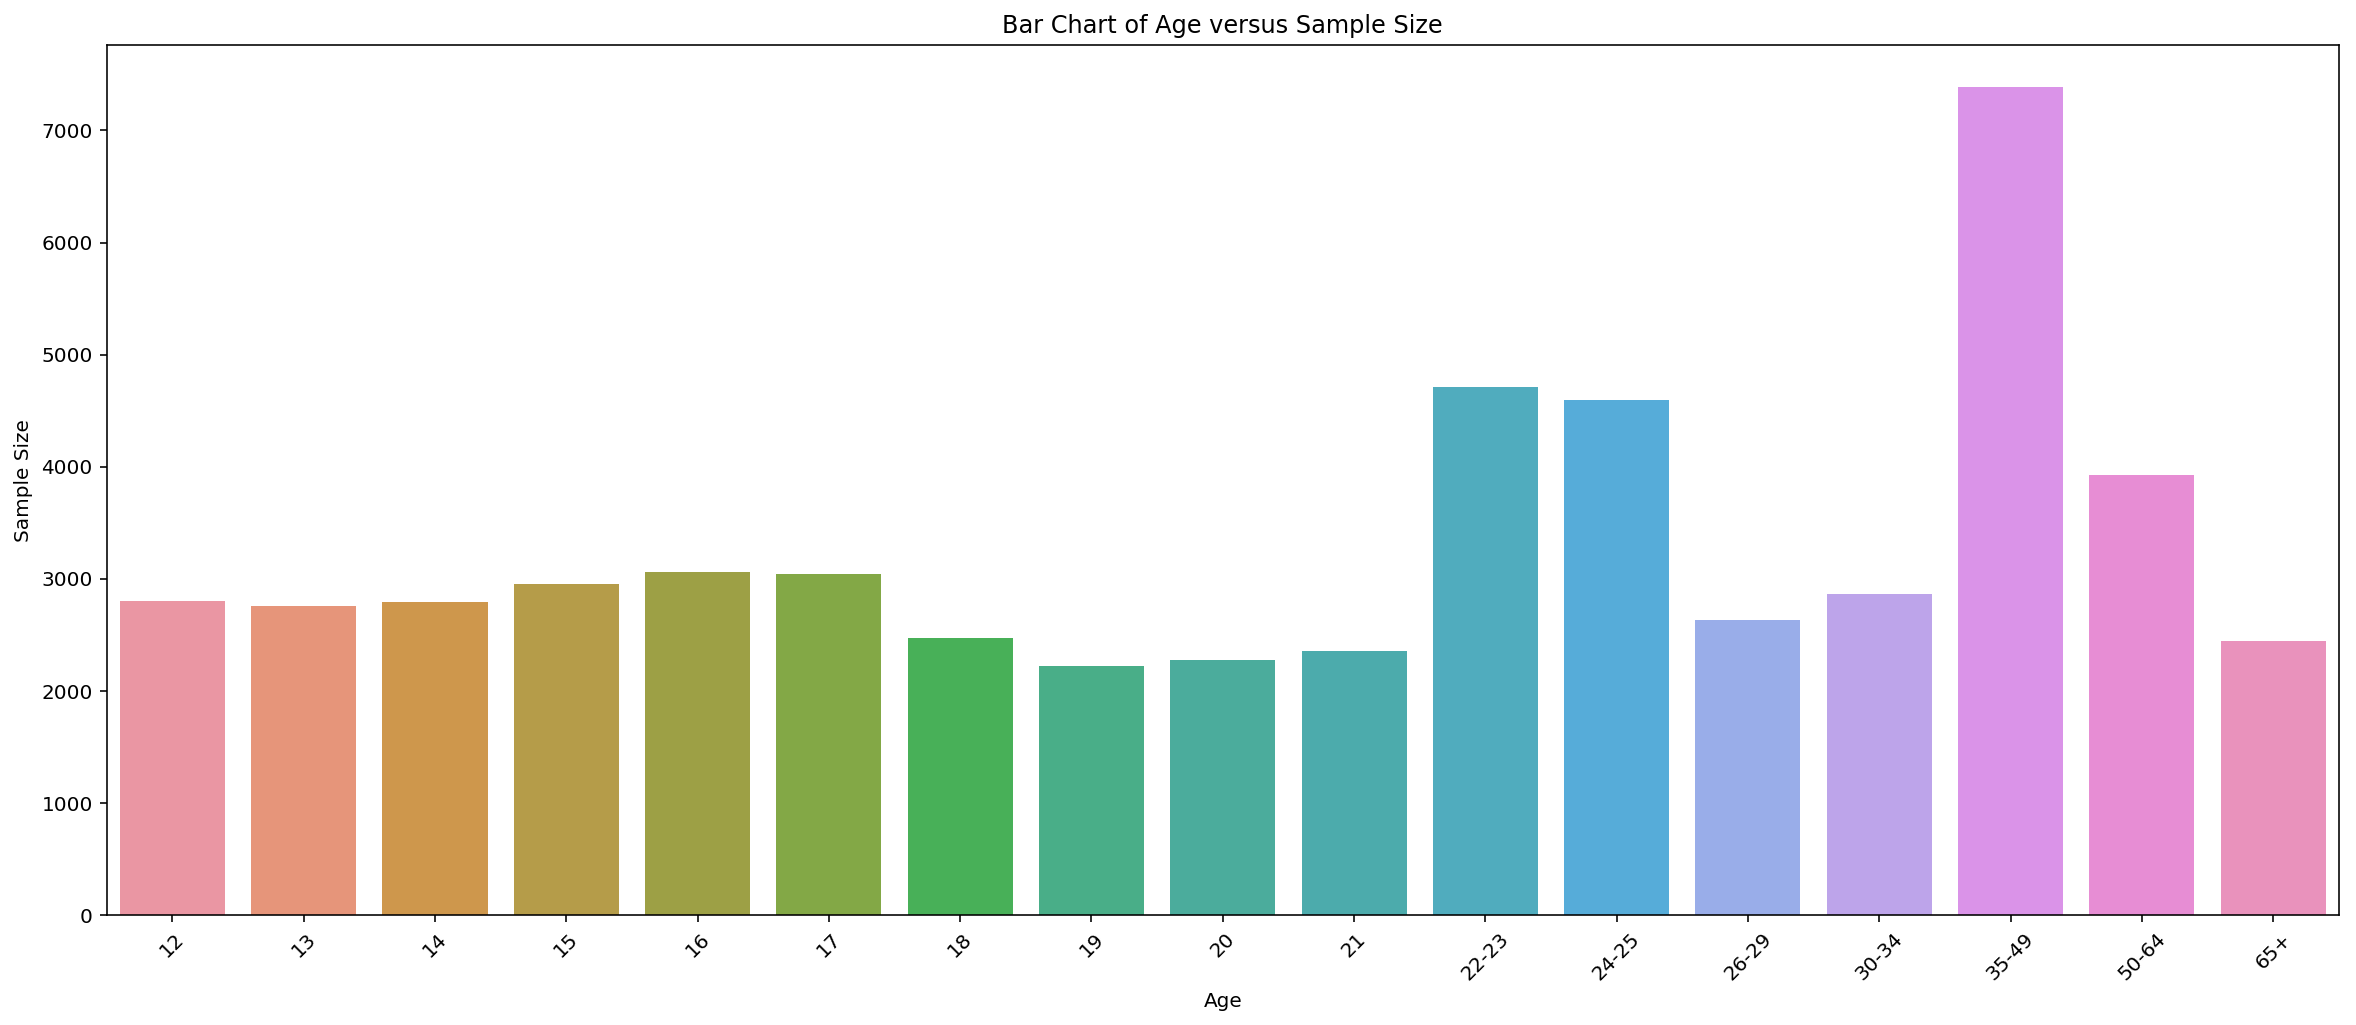

In [54]:
plt.figure(figsize=(20,8))
sns.barplot(data=drugs_age, x='age', y='n')
plt.title('Bar Chart of Age versus Sample Size')
plt.ylabel('Sample Size')
plt.xlabel('Age')
plt.xticks(rotation=45)
plt.show()

> The Sample Size:
> - Would having a much largest sample size for 22-23, 24-25, 35-49, 50-64 year olds lead to a skewed percentage and frequency median if taken as a whole?
> - For example, alcohol use would definitely be higher in these catagories as they are above the legal drinking age (of 21 in the US). 

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Questions**

- Use vs Frequency based on age. 
- Do they use more frequent as they got older or there was a peak use of drugs? 
- Possible to detect first signs of potential drug abuse?

** Deliverables **

- Signs of multiple use.


In [55]:
# Check use vs age
drugs_use_age_df = pd.concat([drugs_df[['age']], drugs_use_df], axis=1)

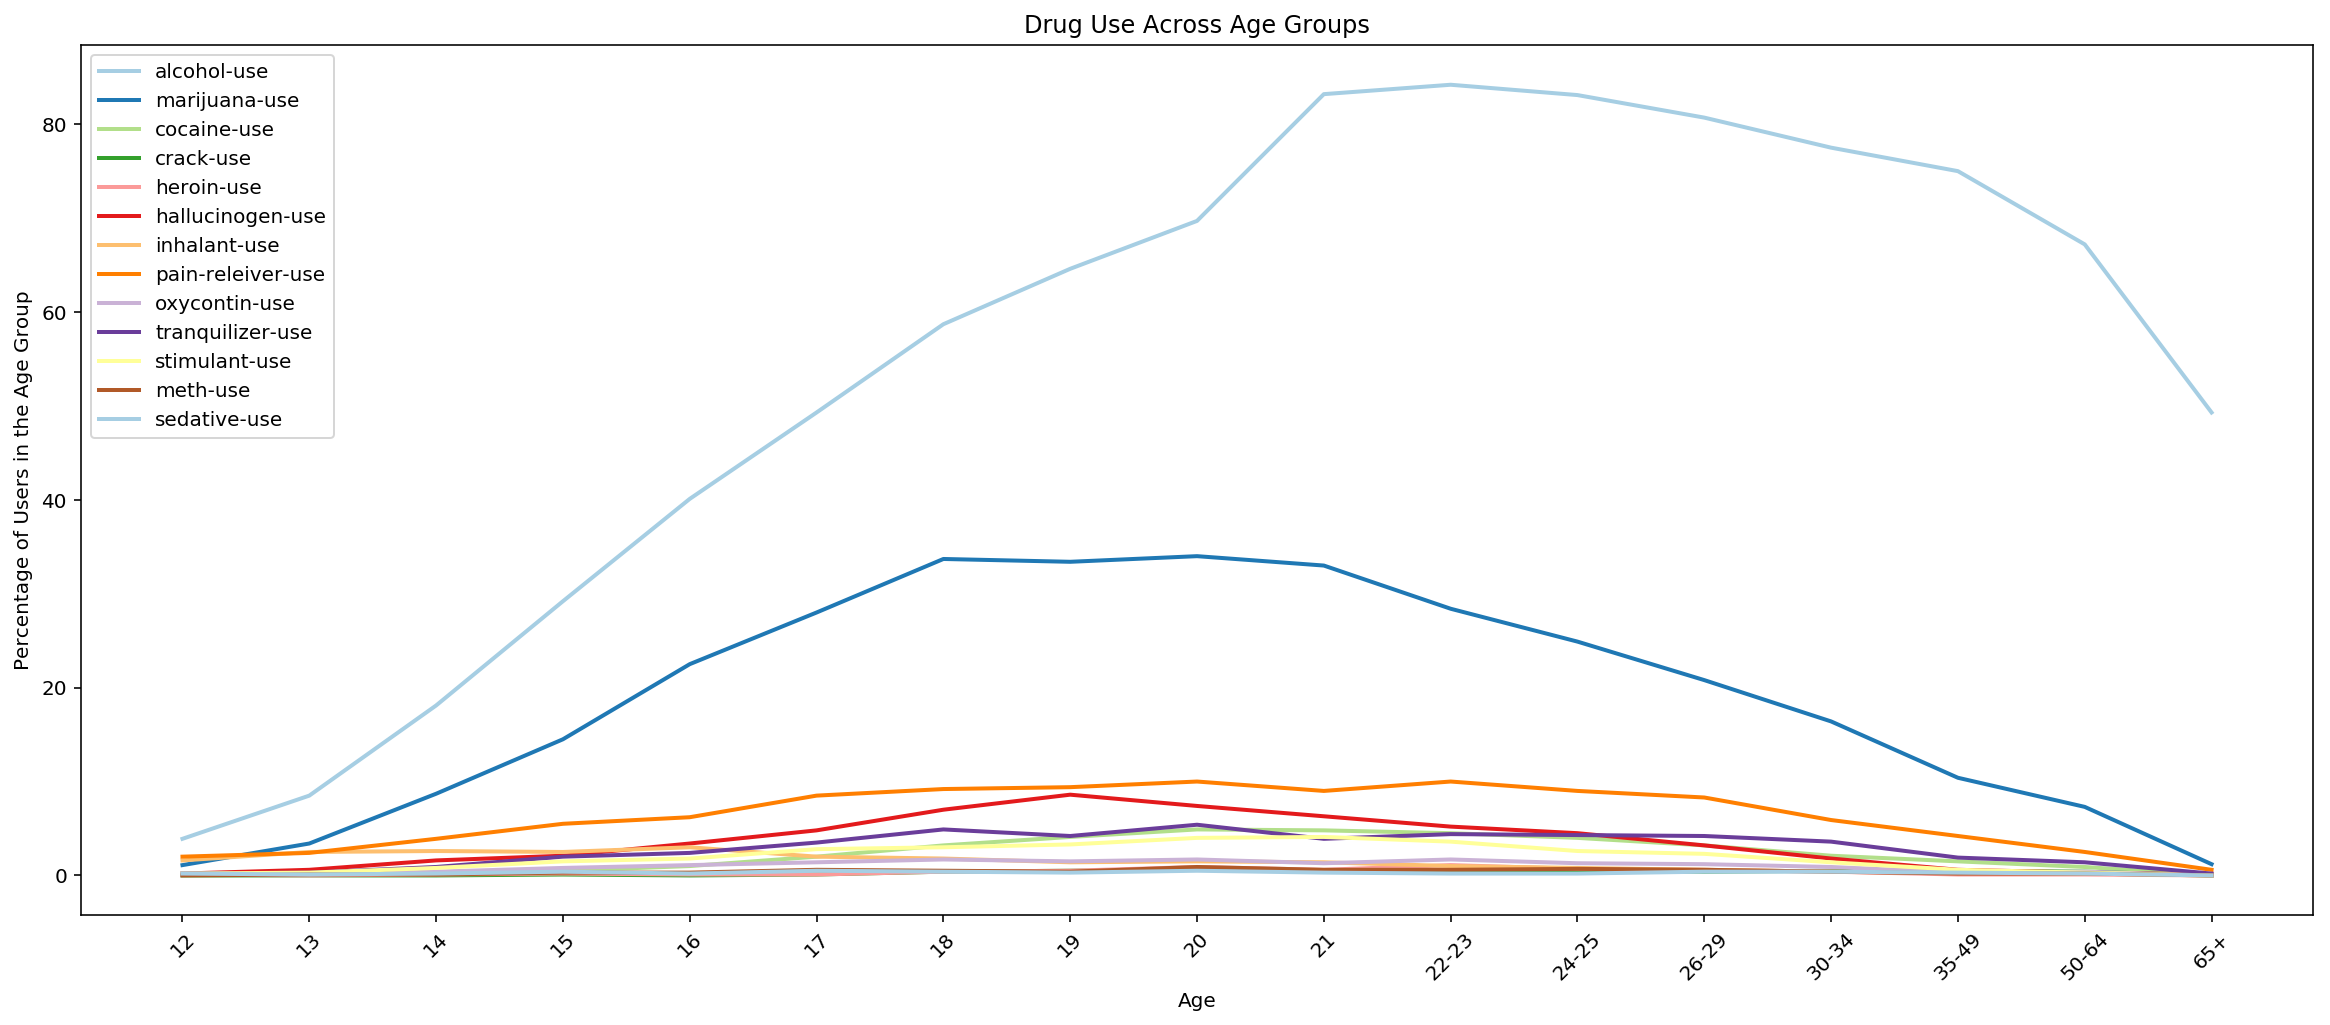

In [56]:
plt.figure(figsize=(20,8))

# Multiple line plot
num=0
for column in drugs_use_age_df.drop('age', axis=1):
    num+=1
    plt.plot(drugs_use_age_df['age'], drugs_use_age_df[column], marker='', linewidth=2, label=column)

plt.title('Drug Use Across Age Groups')
plt.ylabel('Percentage of Users in the Age Group')
plt.xlabel('Age')
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.show()

In [57]:
# Check frequency vs age
drugs_freq_age_df = pd.concat([drugs_df[['age']], drugs_freq_df], axis=1)

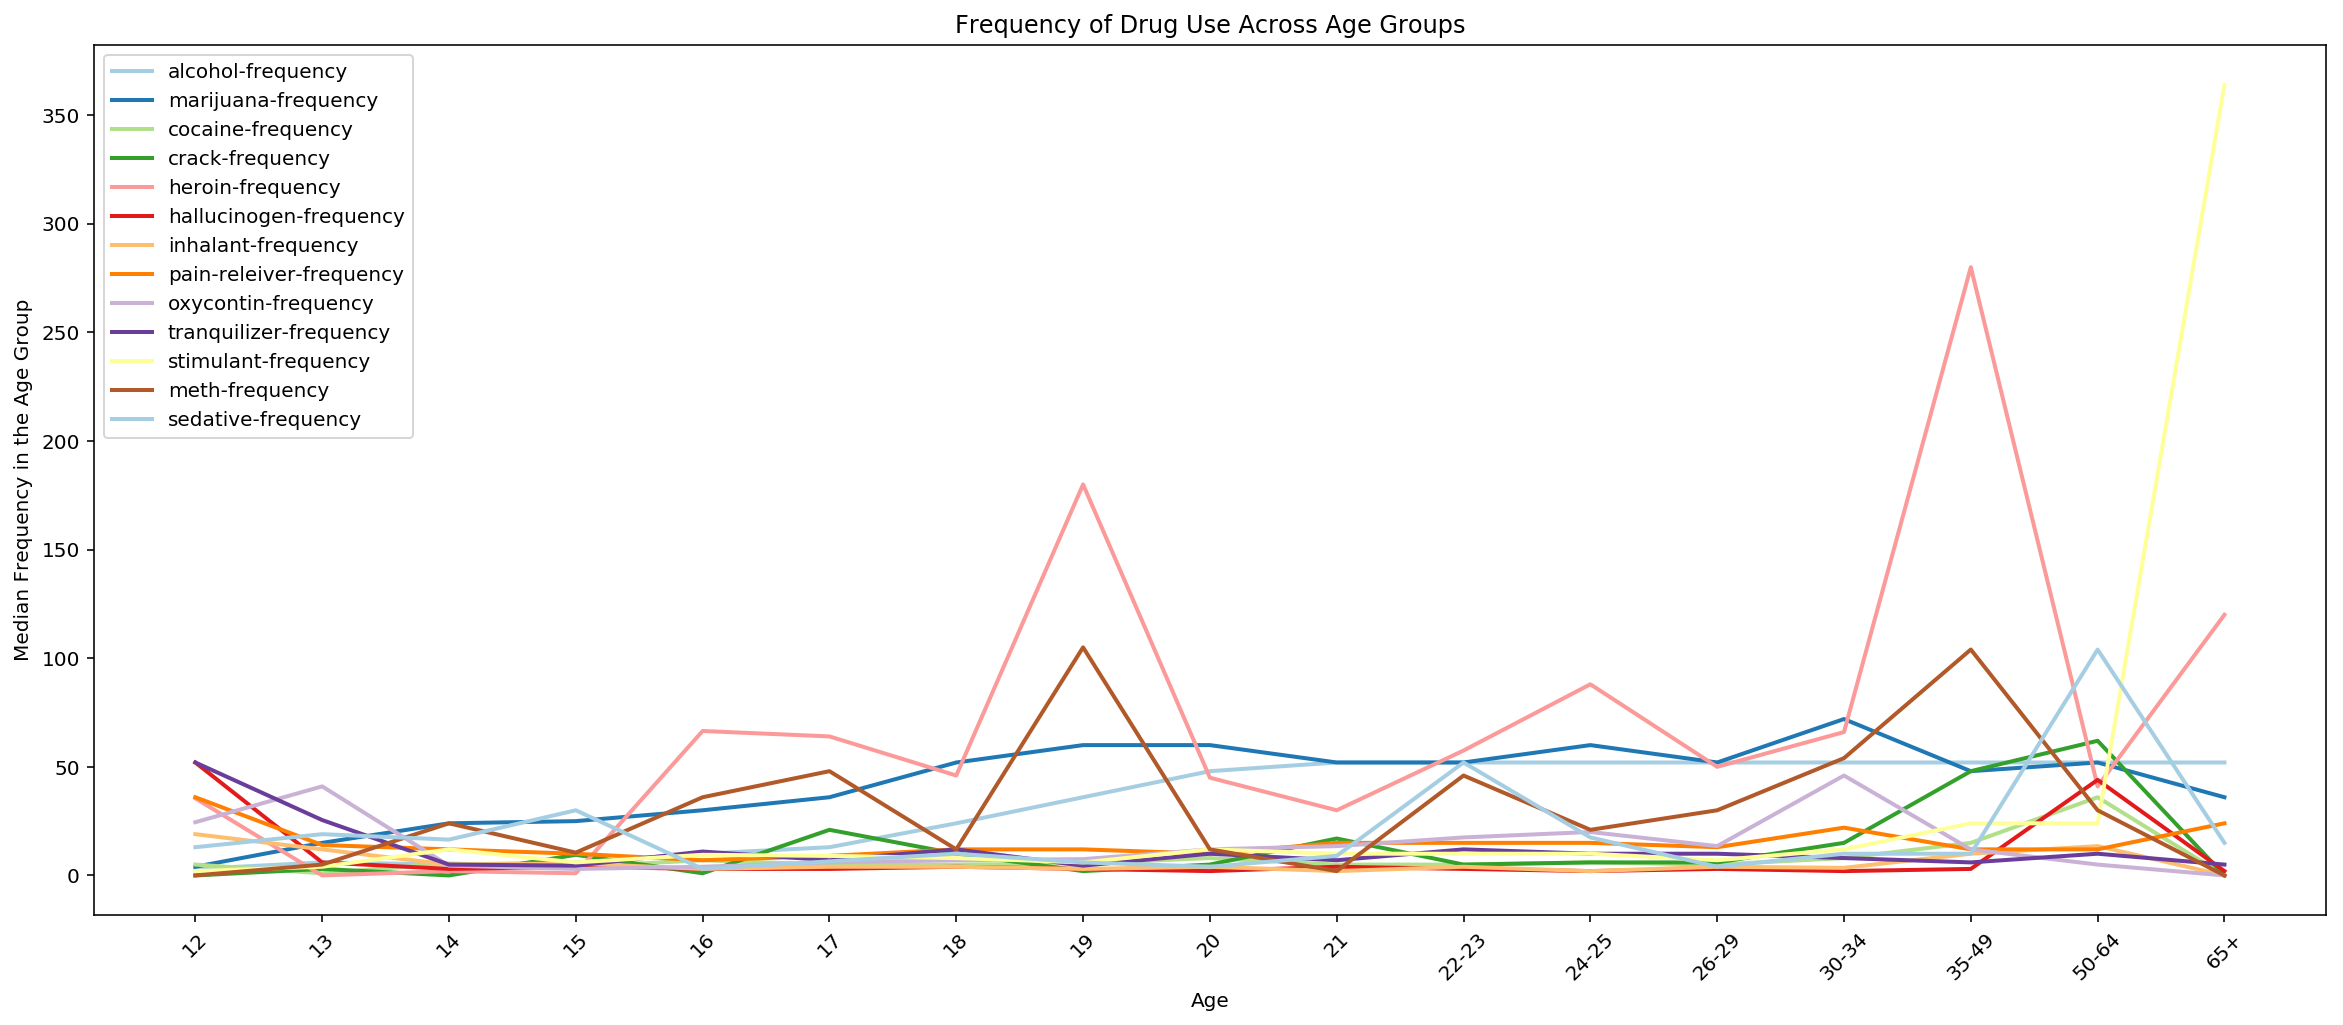

In [58]:
plt.figure(figsize=(20,8))

# Multiple line plot
num=0
for column in drugs_freq_age_df.drop('age', axis=1):
    num+=1
    plt.plot(drugs_freq_age_df['age'], drugs_freq_age_df[column], marker='', linewidth=2, label=column)

plt.title('Frequency of Drug Use Across Age Groups')
plt.ylabel('Median Frequency in the Age Group')
plt.xlabel('Age')
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.show()

**Report**

Repeat Offenders:
- Looking at heroin and meth, looks like 18-20 years old and 35-49 year olds use them often and there is an increase again in the 65+ age group. 
- However, the older age group (35-49) tend to use it more often than 19 year olds. 
- This **might** be the first few signs of drug abuse at different stages of life. Although experiment did not track users over a span of years, it might be possible to iterate that if someone is exposed to heroin and/or meth at a young age, they would most likely revisit the drug at a higher frequency later on in life. 

Stimulant use is strong in the 65+ age group.

Crack and sedative use show an increment between 30-64 year olds then it drops off at 65+. Considering sedative and stimulant have opposite effects, it is perhaps safe to say that these people do not switch to one another despite switching in frequency data.

A lot of drug use >35 years old. Medicinal purposes?

Marijuana and alcohol users tend to be stable users. The frequencies does not have sudden spikes.

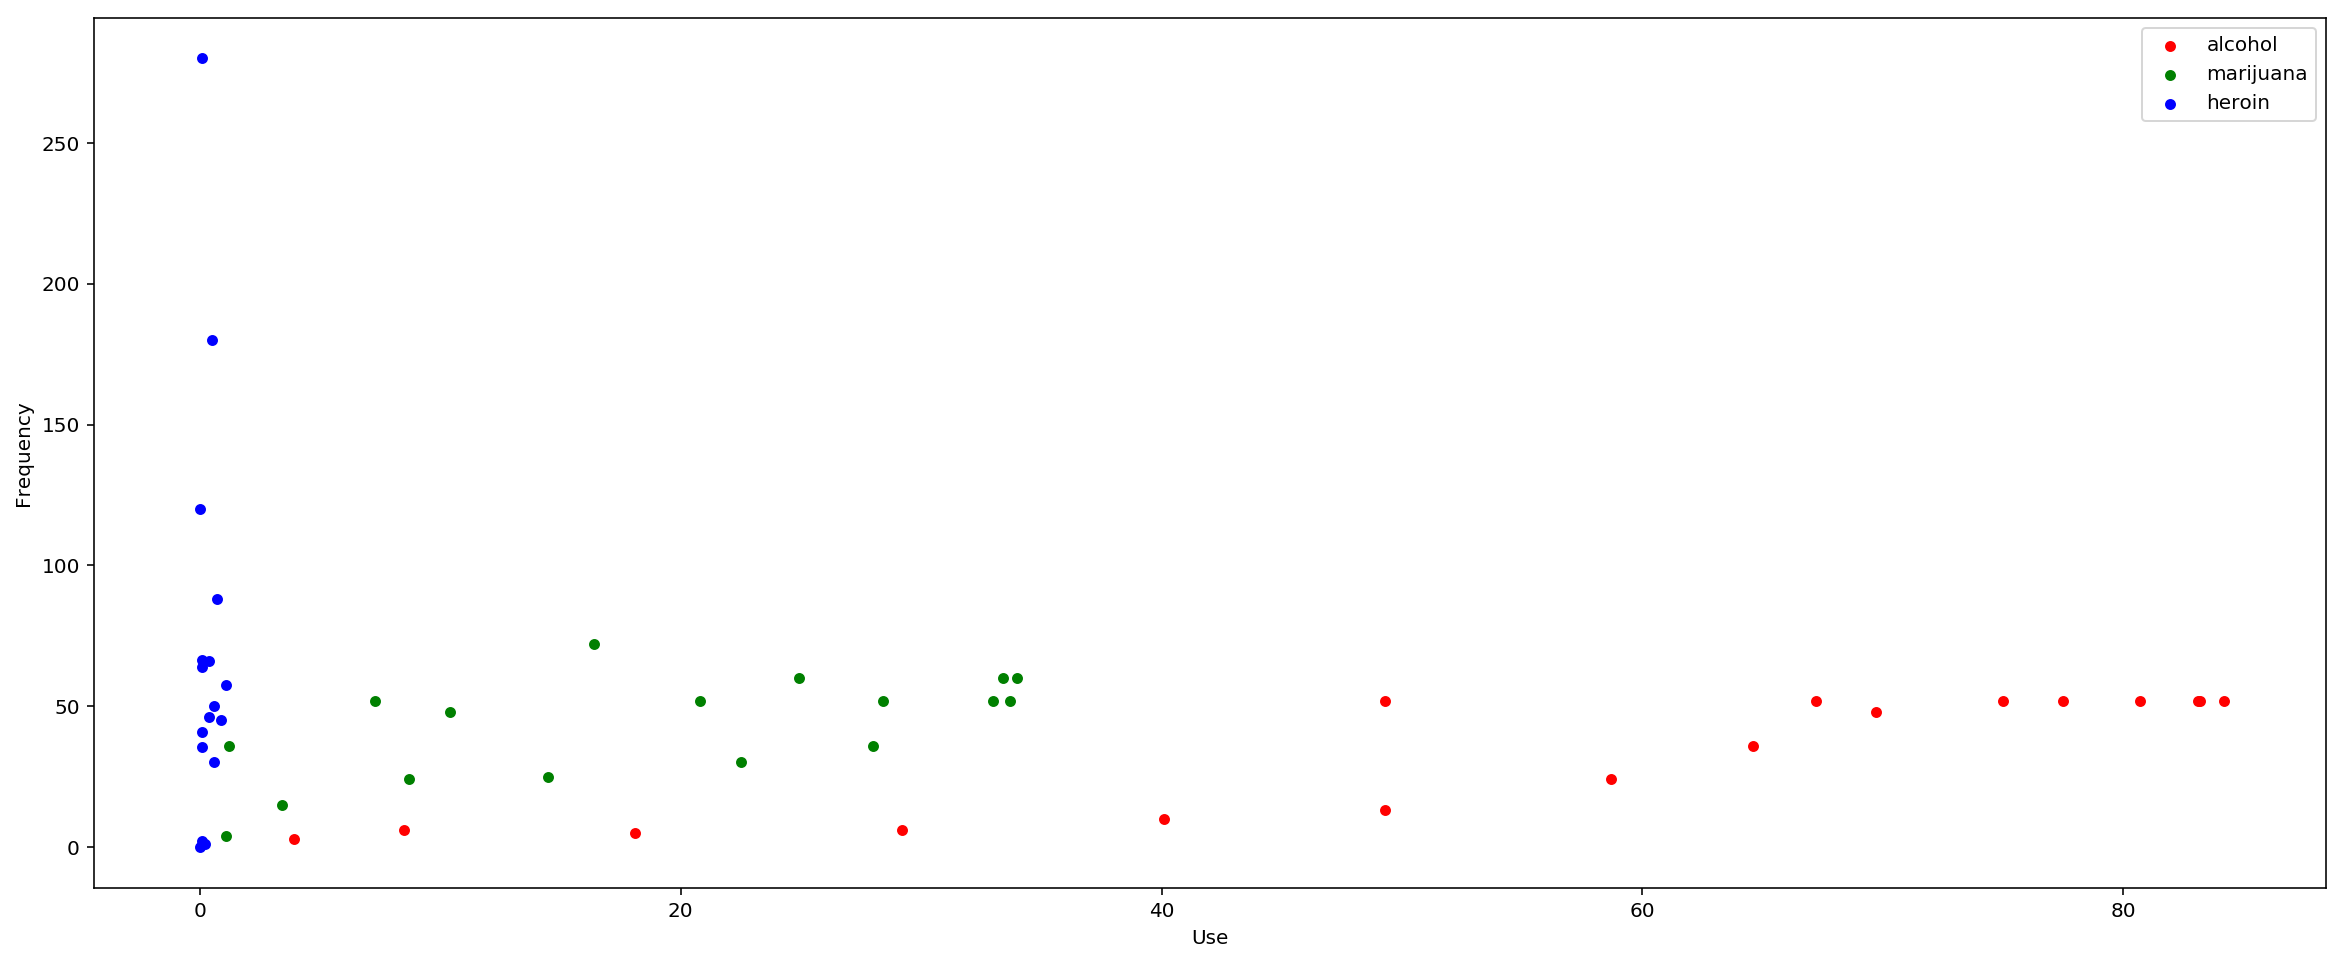

In [59]:
# Overlay some scatter plots for fun

ax1 = drugs_df.plot(kind='scatter', x='alcohol-use', y='alcohol-frequency', color='r', label='alcohol', figsize=(20,8))    
ax2 = drugs_df.plot(kind='scatter', x='marijuana-use', y='marijuana-frequency', color='g', ax=ax1, label='marijuana')    
ax3 = drugs_df.plot(kind='scatter', x='heroin-use', y='heroin-frequency', color='b', ax=ax1, label='heroin')
plt.xlabel('Use')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()

#### Using Hypothesis Testing

Hypothesis statement: I want to test if young people used more drugs than older people. 

H${_0}$: ${\mu_o}$ = ${\mu_y}$

H${_1}$: ${\mu_o}$ < ${\mu_y}$

Where ${\mu_o}$ is mean of drug use for older people (age > 30) and ${\mu_y}$ is mean of drug use for peopl younger than 30.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the `Rate` variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

In [60]:
sat_scores_df = sat_df.drop('Rate', 1)

> Outliers are pretty much those that are > 3 times the standard deviation away from the mean (both ways).

In [61]:
sat_scores_df.describe()

,Verbal,Math,diff_verbal_math
count,52.000000,52.000000,52.000000
mean,532.019231,531.500000,0.519231
std,33.236225,36.014975,15.729939
min,482.000000,439.000000,-30.000000
25%,501.000000,504.000000,-6.000000
50%,526.500000,521.000000,0.000000
75%,562.000000,555.750000,4.250000
max,593.000000,603.000000,95.000000


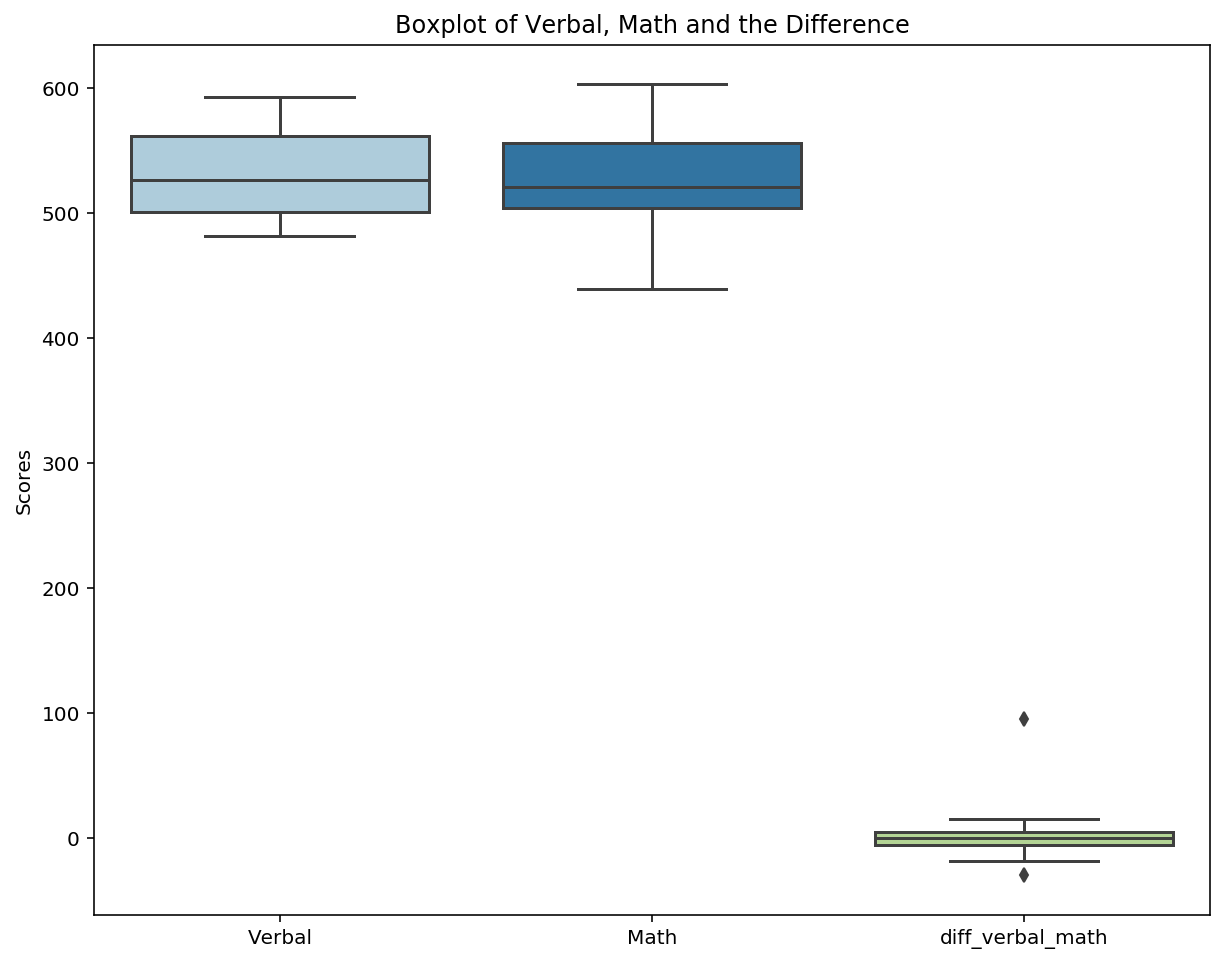

In [62]:
plt.figure(figsize=(10,8))
sns.boxplot(data=sat_scores_df, orient='v')
plt.ylabel('Scores')
plt.title('Boxplot of Verbal, Math and the Difference')
plt.show()

In [63]:
# Somehow I think using IQR here might be better than std()
positive_outliers = sat_scores_df['diff_verbal_math'].mean() + 3*sat_scores_df['diff_verbal_math'].std()
negative_outliers = sat_scores_df['diff_verbal_math'].mean() - 1.5*sat_scores_df['diff_verbal_math'].std()

outliers = sat_scores_df[(sat_scores_df['diff_verbal_math'] > positive_outliers) | (sat_scores_df['diff_verbal_math'] < negative_outliers)]
outliers

,State,Verbal,Math,diff_verbal_math
21,HI,485,515,-30
27,OH,534,439,95


In [64]:
# Using IQR instead of std()
Q1 = sat_scores_df.quantile(0.25)
Q3 = sat_scores_df.quantile(0.75)
IQR = Q3 - Q1
((sat_scores_df < (Q1 - 1.5 * IQR)) | (sat_scores_df > (Q3 + 1.5 * IQR))).sum()

# Ignore State

Math                 0
State               52
Verbal               0
diff_verbal_math     2
dtype: int64

In [65]:
# Remove Hawaii and Ohio from sat_scores_df
sat_scores_df_no_outlier = sat_scores_df.drop(sat_scores_df.index[[21,27]])

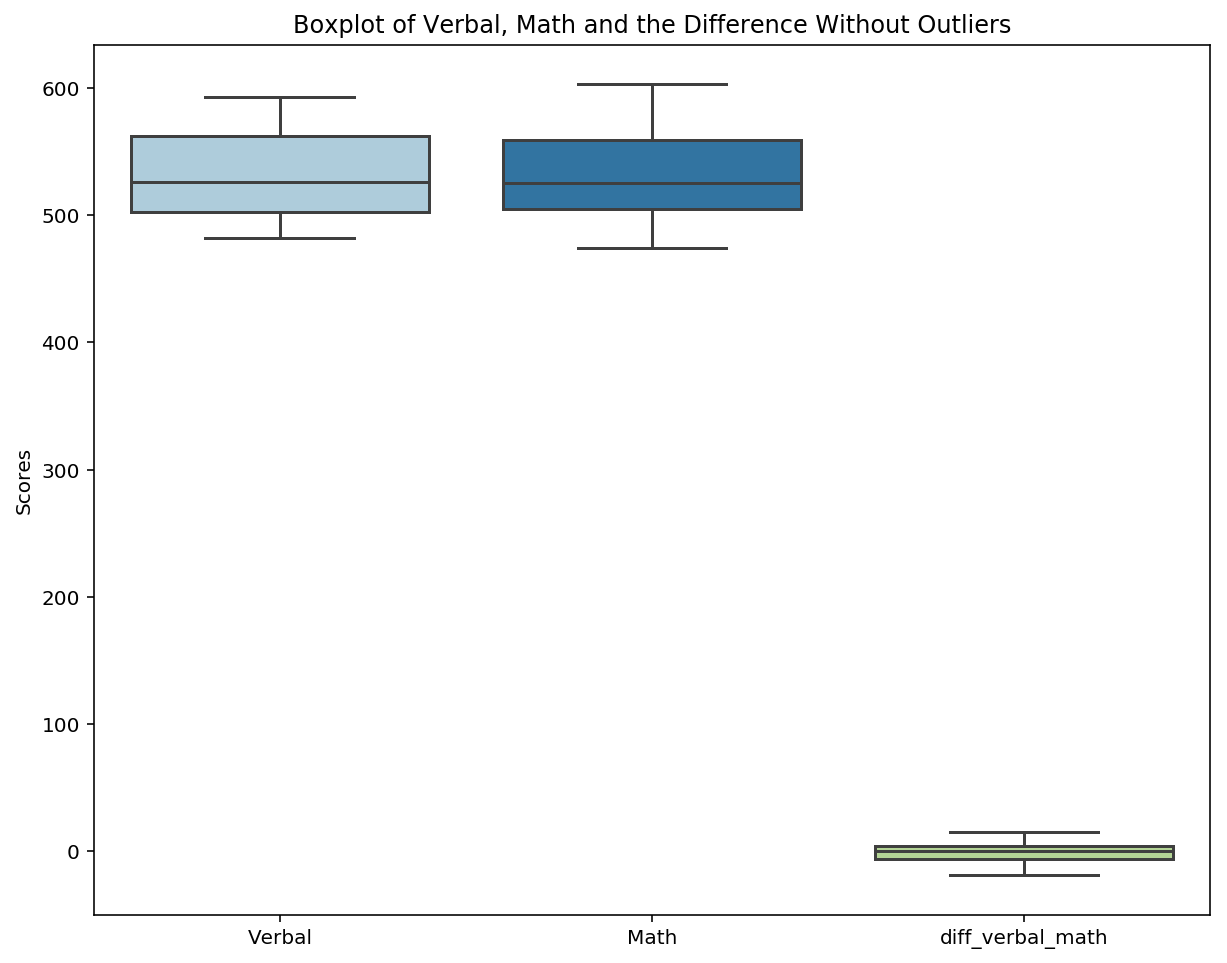

In [66]:
plt.figure(figsize=(10,8))
sns.boxplot(data=sat_scores_df_no_outlier, orient='v')
plt.ylabel('Scores')
plt.title('Boxplot of Verbal, Math and the Difference Without Outliers')
plt.show()

In [67]:
sat_scores_df_no_outlier.describe()

,Verbal,Math,diff_verbal_math
count,50.000000,50.00000,50.000000
mean,532.920000,533.68000,-0.760000
std,33.222097,34.13206,7.394317
min,482.000000,474.00000,-19.000000
25%,502.250000,505.25000,-6.000000
50%,526.500000,525.50000,0.000000
75%,562.000000,559.25000,4.000000
max,593.000000,603.00000,15.000000


In [68]:
sat_scores_df.describe()

,Verbal,Math,diff_verbal_math
count,52.000000,52.000000,52.000000
mean,532.019231,531.500000,0.519231
std,33.236225,36.014975,15.729939
min,482.000000,439.000000,-30.000000
25%,501.000000,504.000000,-6.000000
50%,526.500000,521.000000,0.000000
75%,562.000000,555.750000,4.250000
max,593.000000,603.000000,95.000000


> Observations:
> - Verbal and Math column data did not move much even with the outliers removed. Which is slightly surprising. I expected a bigger difference due to removing some data from the top/tail end of both. 
> - The most obvious is Math having a higher min() value. I postulate this is due to the low scores in Math are generally very low compared to Verbal. So removing the lower scores, would just shorten the range of scores in Math.
> - The mean is now lower (-0.76 vs. 0.52) for the diff_verbal_math column and the standard deviation is not as extreme (7.4 vs. 15.7)


<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


In [69]:
sat_verbal_math_df = sat_df[['Verbal','Math']]
sat_verbal_math_df.corr('spearman')

,Verbal,Math
Verbal,1.000000,0.905205
Math,0.905205,1.000000


In [70]:
sat_verbal_math_df.corr('pearson')

,Verbal,Math
Verbal,1.000000,0.899871
Math,0.899871,1.000000


> The Difference:
> - The Spearman Rank correlation measures the rank of one variable against another. i.e how well you do in math versus how well you do in verbal tests.
> - A strong positive spearman rank correlation means that if you do well in math you will most likely also do well in verbal test.
> - A strong negative spearkman rank means that if you do well in one, you would most likely do poorly in the other. 
> - The Spearman Rank correlation is not as sensitive to outliers because it does not take into account how far away the outliers are from the average. 
> - It is only concerned about the order of those outliers versus everyone else. 
> - Outliers in this dataset were those states that did well in one subject but poorly in the other (the two biggest difference). But since these are ranked aka sorted according to how they scores are; doing very well in Math and then doing average in Verbal test will only result is a high rank difference. Which will give us a negative spearman rank correlation (not zero linear pearson correlation).

> How does it calculate?
> - First we take one column (let's say Verbal) and we sort them in descending order. We take the equivalent Math scores and sort them in descending order as well. 
> - We now have two sorted columns and the ranks (1-52).
> - We then calculate the difference in ranks. For example, let's pretend that California was ranked 1 in Math but ranked 5 in Verbal scores. The difference would be 4.
> - We do this for all of the states and then we take the squared value: difference${^2}$ and divide over the number of states we have (ish).
> - We do the inverse, i.e 1 minus the value from the previous line. 
> - ...and we get a value that is between +1 and -1 and not zero (that would be greatz).

> In the previous episode:
> - I observed that states that do well in Math tend to also do well in Verbal tests. The 0.8998 spearman rank score suggests that it might, or at least there's a low possibility that it is so by chance (0.1% possibility that this happened by chance).

### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

In [71]:
sorted_rate = sat_df['Rate'].sort_values()

In [72]:
sat_df['rate_percentile'] = sat_df['Rate'].apply(lambda x: stats.percentileofscore(sorted_rate, x))

In [73]:
sat_df.head()

,State,Rate,Verbal,Math,diff_verbal_math,rate_percentile
0,CT,82,509,510,-1,100.000000
1,NJ,81,499,513,-14,98.076923
2,MA,79,511,515,-4,96.153846
3,NY,77,495,505,-10,94.230769
4,NH,72,520,516,4,92.307692


In [74]:
sat_df[sat_df['State'] == 'CA']

,State,Rate,Verbal,Math,diff_verbal_math,rate_percentile
23,CA,51,498,517,-19,56.730769


> Percentile scoring and the spearman rank correlation are related in the sense that they both take a value that is calculated by how they are ranked in relation to one another in some sorted order, and **not** based on the difference from the mean.
>
> Percentile scoring ranks each value against a sorted order to find in which percentile do the value fall in. For example, take New York state. A 94.23 percentile score means that the state's participantion rate of 77 is in the top 94.23% of the entire dataset. That there were 3 other states that had a higher participation rate than it (100% - 94.23% x 52). 

### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.

> The Spearman Rank correlation is not as sensitive to outliers because it does not take into account how far away the outliers are from the average. 

In [75]:
# Variable of choice: alcohol
#
# I am using .loc here because pandas was complaining about SettingWithCopy with warning if I don't

drugs_alcohol = drugs_df.loc[:,['age','alcohol-use']]

In [76]:
drugs_alcohol.head()

,age,alcohol-use
0,12,3.9
1,13,8.5
2,14,18.1
3,15,29.2
4,16,40.1


In [77]:
sorted_alcohol_use = drugs_alcohol['alcohol-use'].sort_values()

In [78]:
drugs_alcohol['alcohol_percentile'] = drugs_alcohol['alcohol-use'].apply(lambda y: stats.percentileofscore(sorted_alcohol_use, y))

In [79]:
drugs_alcohol.head()

,age,alcohol-use,alcohol_percentile
0,12,3.9,5.882353
1,13,8.5,11.764706
2,14,18.1,17.647059
3,15,29.2,23.529412
4,16,40.1,29.411765


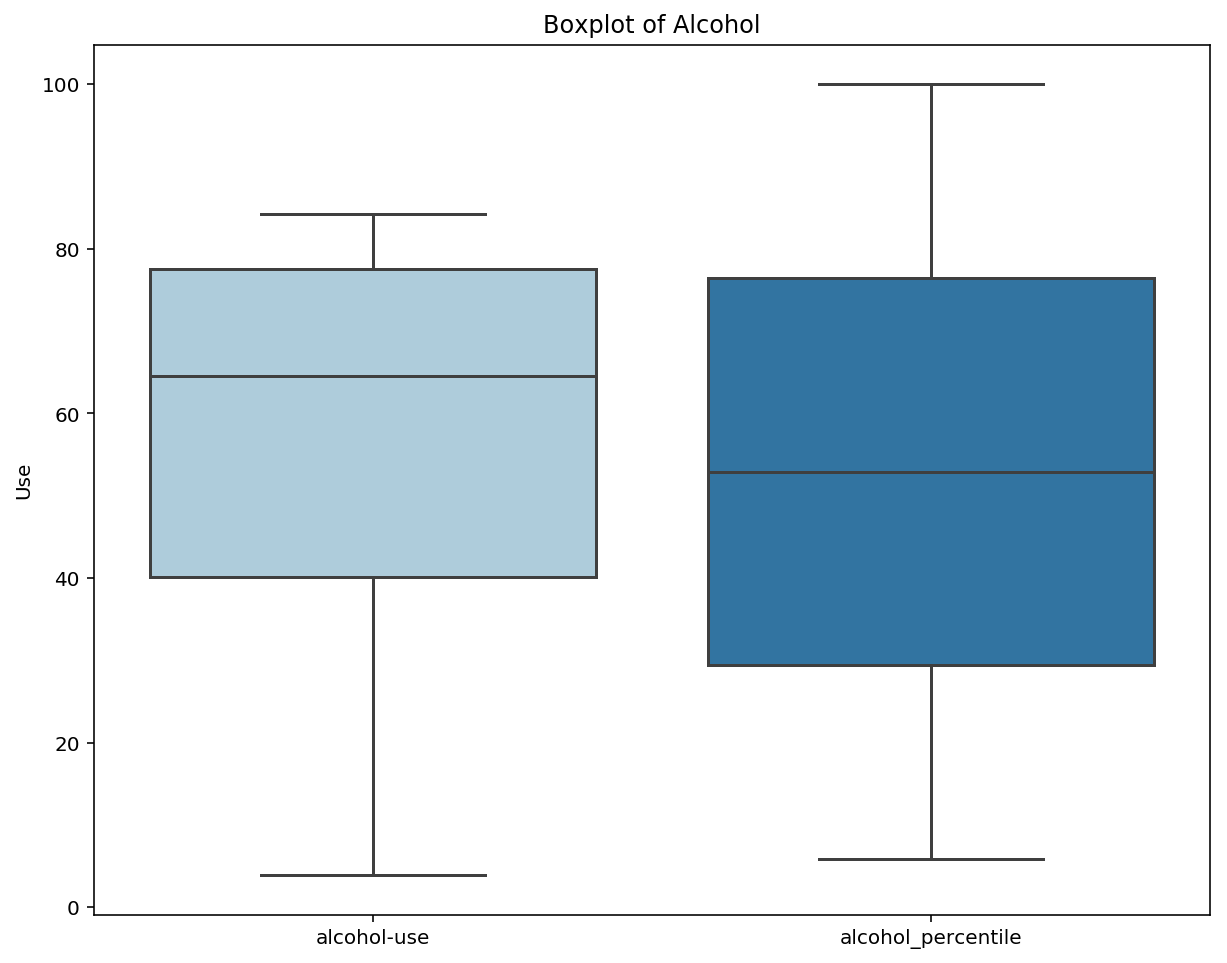

In [80]:
plt.figure(figsize=(10,8))
sns.boxplot(data=drugs_alcohol, orient='v')
plt.ylabel('Use')
plt.title('Boxplot of Alcohol')
plt.show()

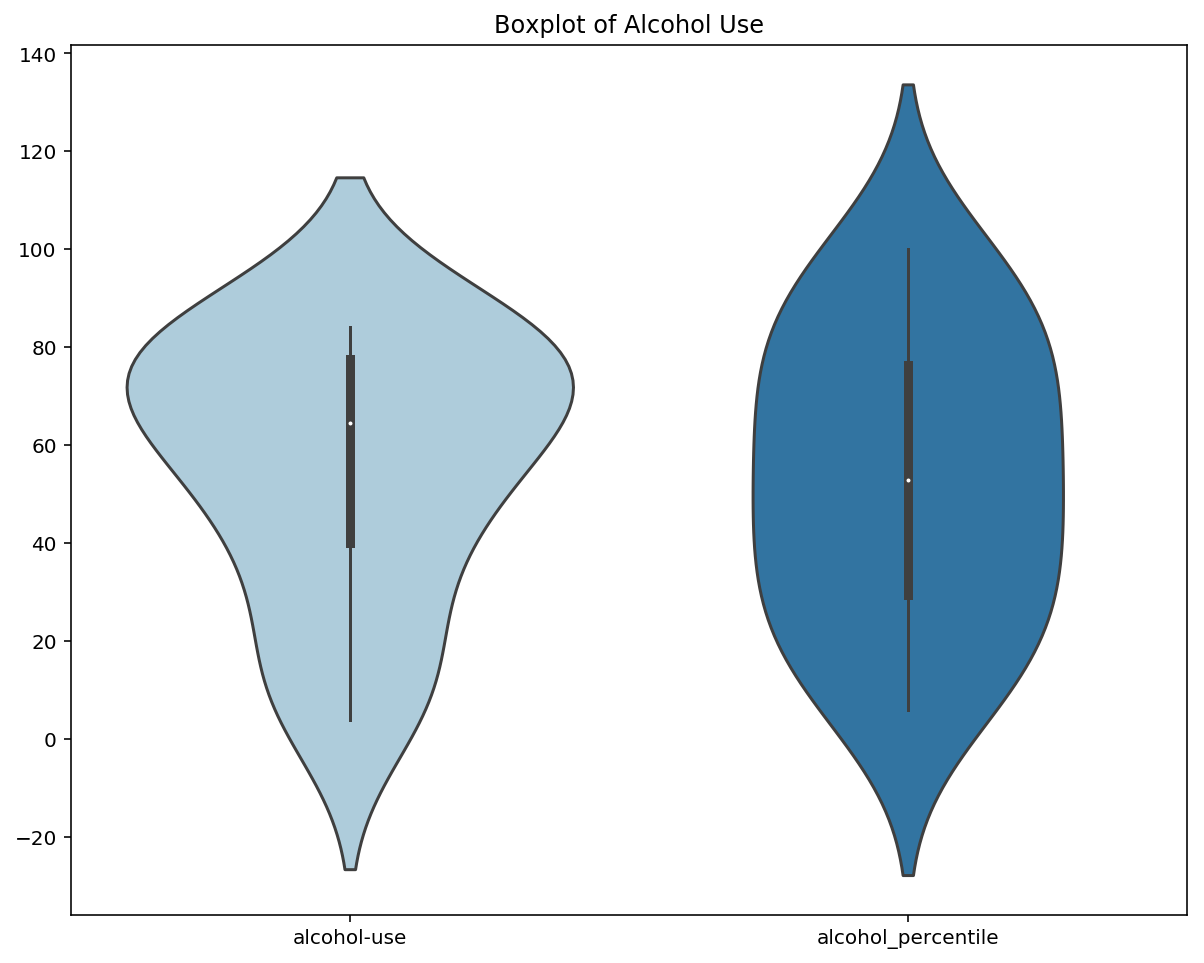

In [81]:
plt.figure(figsize=(10,8))
sns.violinplot(data=drugs_alcohol)
plt.title('Boxplot of Alcohol Use')
plt.show()

> - The original `alcohol-use` column was skewed by the range of use values provided by the sample group.
> - The violinplot shows (clearly) that the majority of the values were clustered on the upper end thus potentially skewing the mean and median higher.
> - The violinplot of `alcohol_percentile` shows a much more even spread of the data.
> - I wonder if this means that percentile scoring 'normalizes' the data?